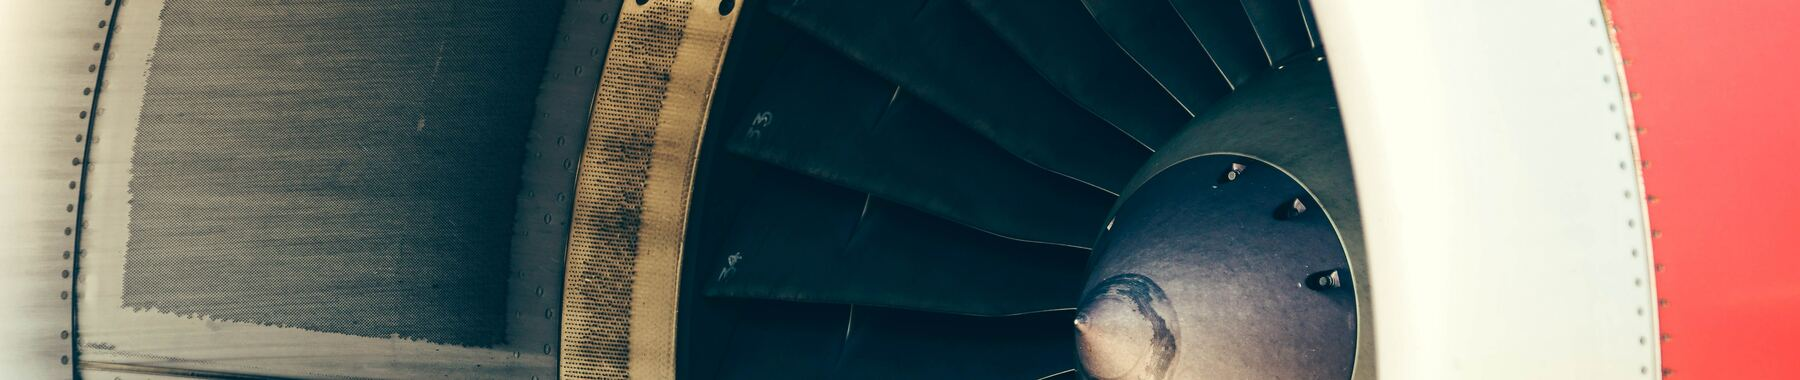

##  Достоверная оценка оставшегося ресурса сложных технических систем
обещает значительную экономию средств (избегая внепланового обслуживания и уменьшая простои оборудования), а также улучшение эксплуатационной безопасности. Оценка оставшегося ресурса сложного агрегата, например реактивного авиадвигателя предоставляет лицам, принимающим решения,информацию, позволяющую им изменить операционные характеристики (такие как нагрузка), которые в свою очередь могут продлить жизнь компонента. Это также позволяет лицам, участвующим в планировании процессов эксплуатации борудования учитывать предстоящее техническое обслуживание и запуск логистического процесса. Достоверная оценка оставшегося ресурса сложных технических систем поддерживает плавный переход от  оборудования, требующего обслуживания к полностью работоспособному. Авиационные двигатели, медицинское оборудование, электростанции и т. д., вот лишь некоторые из распространенных примеров такого оборудования.

## Описание набора данных.

Наборы данных состоят из нескольких многомерных временных рядов. Каждый набор данных далее делится на обучающие и тестовые подмножества. Данные можно считать взятыми из парка двигателей одного типа. Каждый двигатель запускается с различными степенями начального износа и производственного отклонения, которые неизвестны пользователю. Этот износ и отклонение считается нормальным, то есть не считается неисправным состоянием. Существует три режима работы, которые существенно влияют на производительность двигателя. Эти настройки также включены в данные. Данные загрязнены шумами датчиков. Двигатель работает нормально в начале каждого временного ряда, и в какой-то момент в течение ряда возникает неисправность. В обучающем наборе неисправность возрастает по величине до отказа системы. В тестовом наборе временной ряд заканчивается за некоторое время до сбоя системы. Цель работы состоит в том, чтобы предсказать количество оставшихся рабочих циклов до сбоя в тестовом наборе, то есть количество рабочих циклов после последнего цикла тестового набора, в течение которого двигатель будет продолжать работать. Также предоставлен вектор истинных значений оставшегося срока полезного использования (RUL) для тестовых данных.

Данные представлены в виде текстового файла с 26 столбцами чисел, разделенных пробелами. Каждая строка представляет собой снимок данных, взятых в течение одного рабочего цикла. Столбцы соответствуют:

1)	unit number

2)	time, in cycles

3)	operational setting 1

4)	operational setting 2

5)	operational setting 3

6)	sensor measurement  1

7)	sensor measurement  2

...

26)	sensor measurement  26


## Знакомство с данными

In [1]:
import pandas as pd

In [477]:
fd_001_train = pd.read_csv('C:/Users/Игорь/Downloads/nasa-cmaps/CMaps/train_FD001.txt',header=None,sep=' ')

In [478]:
fd_001_train.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8138.62  8.4195  0.03  392  2388  100.0  39.06  23.4190 NaN NaN  
1  ...  8131.49  8.4318  0.03  392  2388  100.0  39.00  23.4236 NaN NaN  
2  ...  8133.23  8.4178  0.03  390  2388  100.0  38.95  23.3442 NaN NaN  
3  ...  8133.83  8.3682  0.03  392  2388  100.0  38.88  23.3739 NaN NaN  
4  ...  8133.80  8.4294  0.03  393  2388  100.0  38.90  23.4044 NaN NaN  

[5 rows x 28 columns]

In [479]:
fd_001_train.describe()

0             1             2             3        4   \
count  20631.000000  20631.000000  20631.000000  20631.000000  20631.0   
mean      51.506568    108.807862     -0.000009      0.000002    100.0   
std       29.227633     68.880990      0.002187      0.000293      0.0   
min        1.000000      1.000000     -0.008700     -0.000600    100.0   
25%       26.000000     52.000000     -0.001500     -0.000200    100.0   
50%       52.000000    104.000000      0.000000      0.000000    100.0   
75%       77.000000    156.000000      0.001500      0.000300    100.0   
max      100.000000    362.000000      0.008700      0.000600    100.0   

             5             6             7             8             9   ...  \
count  20631.00  20631.000000  20631.000000  20631.000000  2.063100e+04  ...   
mean     518.67    642.680934   1590.523119   1408.933782  1.462000e+01  ...   
std        0.00      0.500053      6.131150      9.000605  1.776400e-15  ...   
min      518.67    641.210000   1571.040000   1382.250000  1.462000e+01  ...   
25%      518.67    642.325000   1586.260000   1402.360000  1.462000e+01  ...   
50%      518.67    642.640000   1590.100000   1408.040000  1.462000e+01  ...   
75%      518.67    643.000000   1594.380000   1414.555000  1.462000e+01  ...   
max      518.67    644.530000   1616.910000   1441.490000  1.462000e+01  ...   

                 18            19            20            21       22  \
count  20631.000000  20631.000000  2.063100e+04  20631.000000  20631.0   
mean    8143.752722      8.442146  3.000000e-02    393.210654   2388.0   
std       19.076176      0.037505  1.387812e-17      1.548763      0.0   
min     8099.940000      8.324900  3.000000e-02    388.000000   2388.0   
25%     8133.245000      8.414900  3.000000e-02    392.000000   2388.0   
50%     8140.540000      8.438900  3.000000e-02    393.000000   2388.0   
75%     8148.310000      8.465600  3.000000e-02    394.000000   2388.0   
max     8293.720000      8.584800  3.000000e-02    400.000000   2388.0   

            23            24            25   26   27  
count  20631.0  20631.000000  20631.000000  0.0  0.0  
mean     100.0     38.816271     23.289705  NaN  NaN  
std        0.0      0.180746      0.108251  NaN  NaN  
min      100.0     38.140000     22.894200  NaN  NaN  
25%      100.0     38.700000     23.221800  NaN  NaN  
50%      100.0     38.830000     23.297900  NaN  NaN  
75%      100.0     38.950000     23.366800  NaN  NaN  
max      100.0     39.430000     23.618400  NaN  NaN  

[8 rows x 28 columns]

In [480]:
# удалим пустые колонки
fd_001_train.drop(columns=[26,27],inplace=True)

In [46]:
# сформируем 2 серии для дальнейшей визуализации параметров
series_1 = fd_001_train[fd_001_train[0]==1]
series_2 = fd_001_train[fd_001_train[0]==2]

In [47]:
series_1.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62   
1   1   2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62   
2   1   3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62   
3   1   4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62   
4   1   5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62   

   ...      16       17       18      19    20   21    22     23     24  \
0  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0  39.06   
1  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0  39.00   
2  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0  38.95   
3  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0  38.88   
4  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0  38.90   

        25  
0  23.4190  
1  23.4236  
2  23.3442  
3  23.3739  
4  23.4044  

[5 rows x 26 columns]

In [48]:
#удаление колонок с номером серии и порядковым номером цикла
X1 = series_1.drop(columns=[0,1])
X2 = series_2.drop(columns=[0,1])

In [49]:
X1.head()

2       3      4       5       6        7        8      9      10  \
0 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60  14.62  21.61   
1  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14  14.62  21.61   
2 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20  14.62  21.61   
3  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87  14.62  21.61   
4 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22  14.62  21.61   

       11  ...      16       17       18      19    20   21    22     23  \
0  554.36  ...  521.66  2388.02  8138.62  8.4195  0.03  392  2388  100.0   
1  553.75  ...  522.28  2388.07  8131.49  8.4318  0.03  392  2388  100.0   
2  554.26  ...  522.42  2388.03  8133.23  8.4178  0.03  390  2388  100.0   
3  554.45  ...  522.86  2388.08  8133.83  8.3682  0.03  392  2388  100.0   
4  554.00  ...  522.19  2388.04  8133.80  8.4294  0.03  393  2388  100.0   

      24       25  
0  39.06  23.4190  
1  39.00  23.4236  
2  38.95  23.3442  
3  38.88  23.3739  
4  38.90  23.4044  

[5 rows x 24 columns]

In [50]:
# применим масштабирование к переменным для дальнейшего построения графика суммы всех параметров
from sklearn.preprocessing import StandardScaler

In [51]:
sc = StandardScaler()
X1 = sc.fit_transform(X1)
X2 = sc.fit_transform(X2)

C:\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Miniconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Miniconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Miniconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [52]:
sum_x1 = X1.sum(axis=1)
sum_x2 = X2.sum(axis=1)

In [28]:
import numpy as np
import matplotlib.pyplot as plt

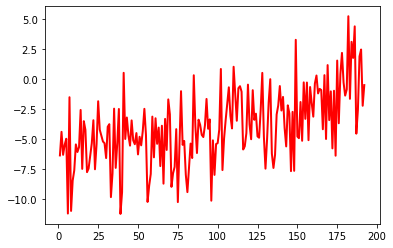

In [57]:
# график суммы параметров для 1 серии
plt.plot(x1, sum_x1, c="r", linewidth=2)

In [55]:
x1 = np.linspace(1, len(sum_x1), len(sum_x1))[:, np.newaxis]
x2 = np.linspace(1, len(sum_x2), len(sum_x2))[:, np.newaxis]

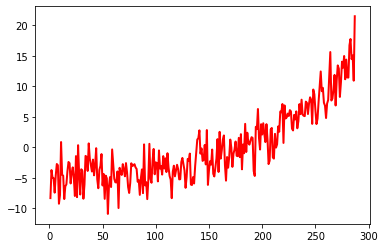

In [56]:
plt.plot(x2, sum_x2, c="r", linewidth=2)

## Как видно данные сильно зашумлены высокочастотной составляющей от датчиков, различных условий испытания, промежуточных техобслуживаний и т.п.
применим один из простейших фильтров для сглаживания высокочастотных колебаний - скользящую среднюю

In [267]:
#функция построения скользящей средней
def SMA(data,period):
    sma=[]
    sma.append(sum(data[:period]) / period)
    for i in range(len(data) - period):
        sma.append(sma[i] + data[period + i] / period - data[i] / period)
    return sma
        

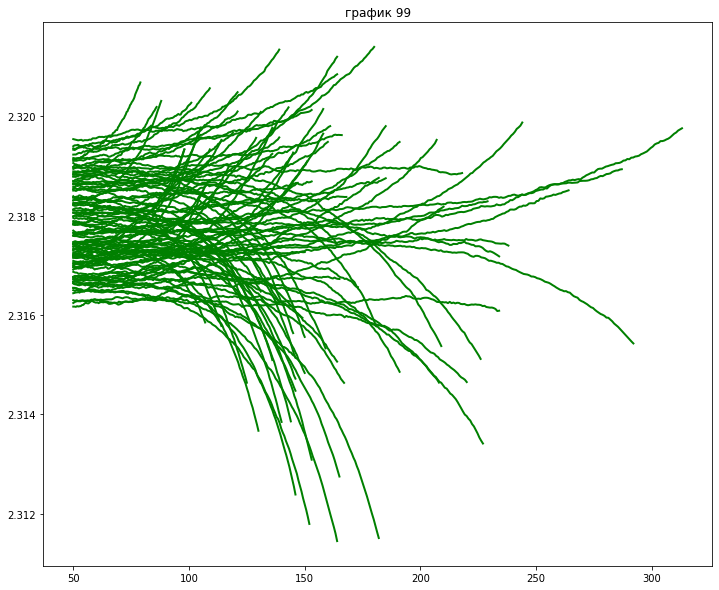

In [511]:
#совместный для нескольких серий график для суммы параметров серии
period = 50
for i in range(1,100):
    series = fd_001_train[fd_001_train[0]==i]
    X = series.drop(columns=[0,1])
    X = normalize(X)
    sum_x = X.sum(axis=1)
    x = np.linspace(period, len(sum_x) - period + 1, len(sum_x) - period + 1)[:, np.newaxis]
    plt.title(f'график {i}')
    avg_x = SMA(sum_x,period)
    plt.plot(x, avg_x, c="g", linewidth=2)
plt.show()

## Посмотрим данные другого набора

In [281]:
fd_003_train = pd.read_csv('C:/Users/Игорь/Downloads/nasa-cmaps/CMaps/train_FD003.txt',header=None,sep=' ')
fd_003_test = pd.read_csv('C:/Users/Игорь/Downloads/nasa-cmaps/CMaps/test_FD003.txt',header=None,sep=' ')

In [282]:
fd_003_train.head()

0   1       2       3      4       5       6        7        8      9   \
0   1   1 -0.0005  0.0004  100.0  518.67  642.36  1583.23  1396.84  14.62   
1   1   2  0.0008 -0.0003  100.0  518.67  642.50  1584.69  1396.89  14.62   
2   1   3 -0.0014 -0.0002  100.0  518.67  642.18  1582.35  1405.61  14.62   
3   1   4 -0.0020  0.0001  100.0  518.67  642.92  1585.61  1392.27  14.62   
4   1   5  0.0016  0.0000  100.0  518.67  641.68  1588.63  1397.65  14.62   

   ...       18      19    20   21    22     23     24       25  26  27  
0  ...  8145.32  8.4246  0.03  391  2388  100.0  39.11  23.3537 NaN NaN  
1  ...  8152.85  8.4403  0.03  392  2388  100.0  38.99  23.4491 NaN NaN  
2  ...  8150.17  8.3901  0.03  391  2388  100.0  38.85  23.3669 NaN NaN  
3  ...  8146.56  8.3878  0.03  392  2388  100.0  38.96  23.2951 NaN NaN  
4  ...  8147.80  8.3869  0.03  392  2388  100.0  39.14  23.4583 NaN NaN  

[5 rows x 28 columns]

In [283]:
fd_003_train.drop(columns=[26,27],inplace=True)

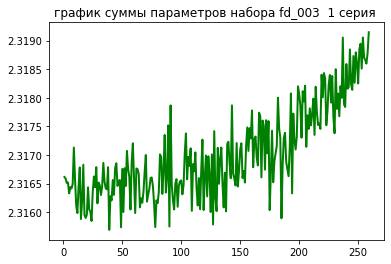

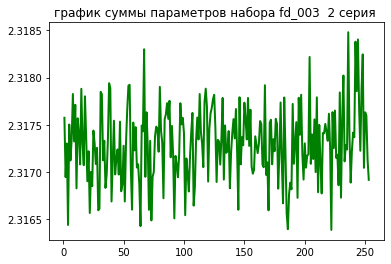

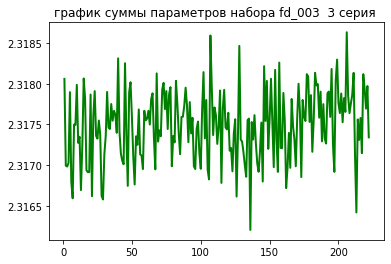

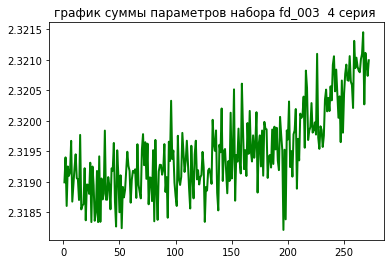

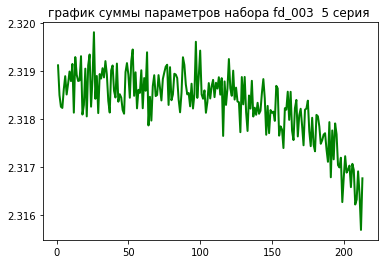

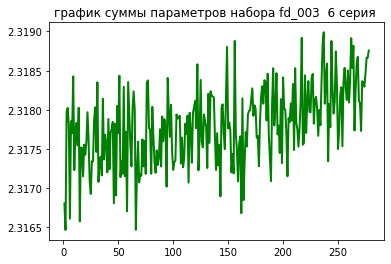

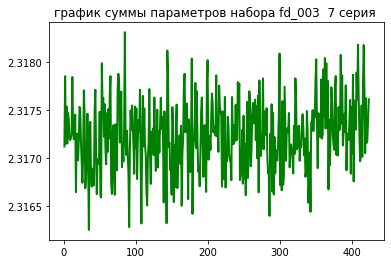

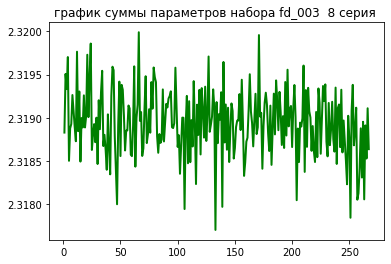

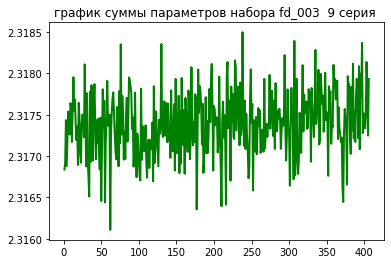

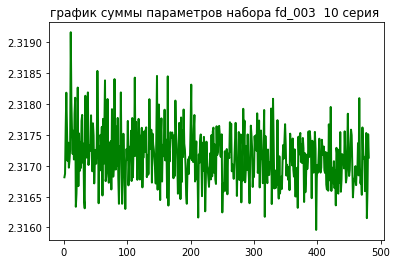

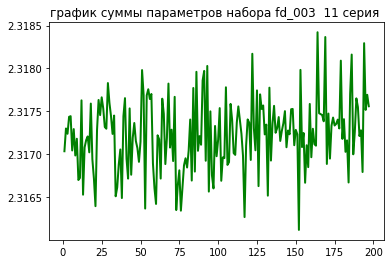

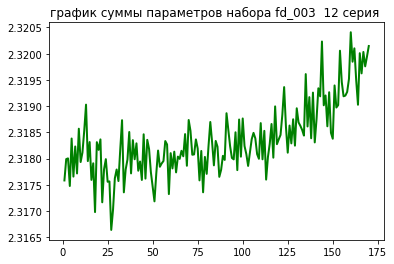

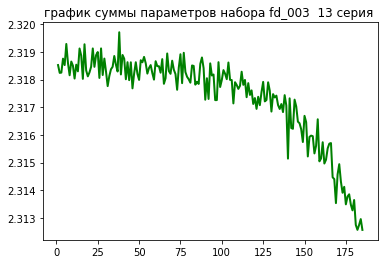

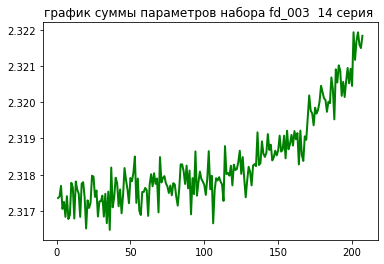

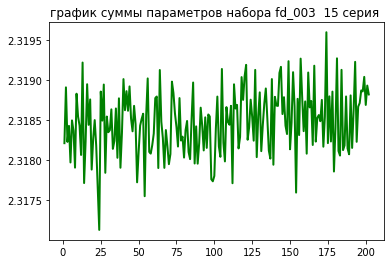

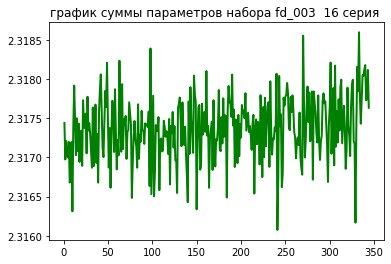

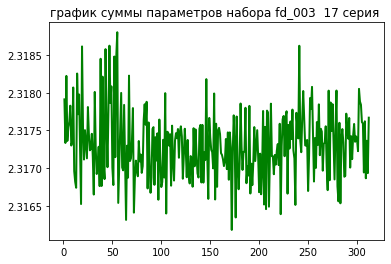

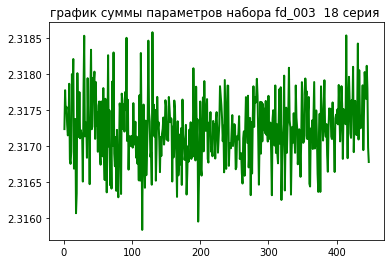

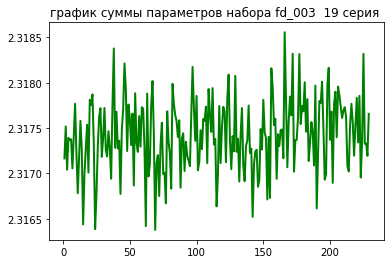

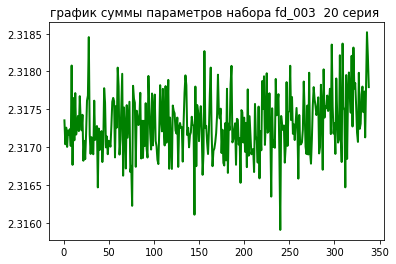

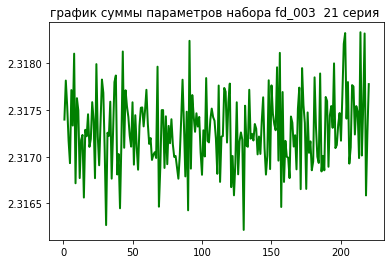

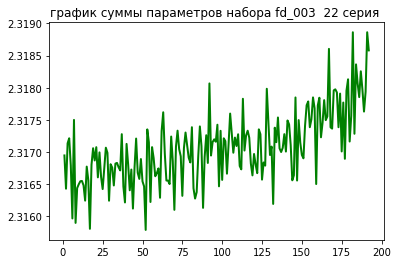

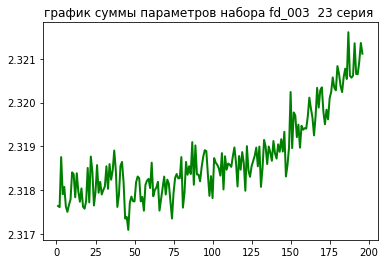

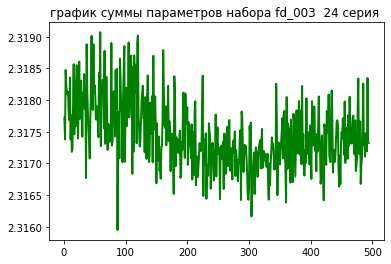

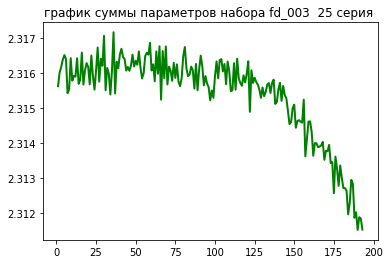

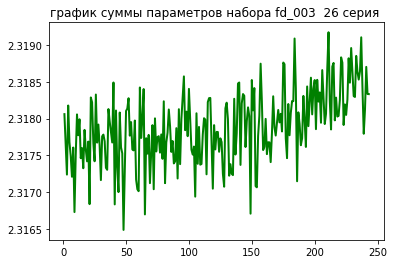

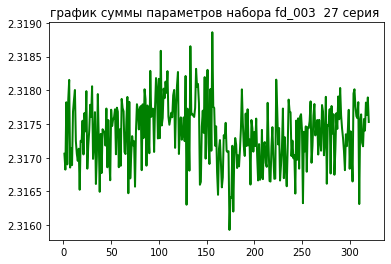

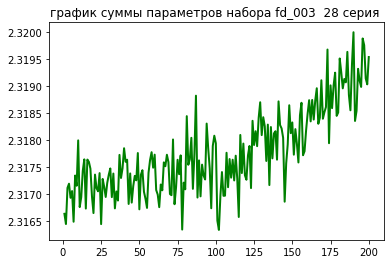

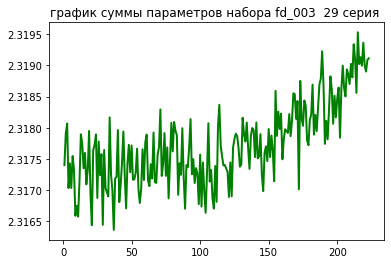

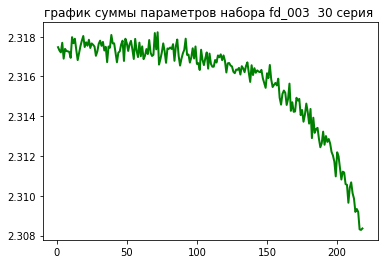

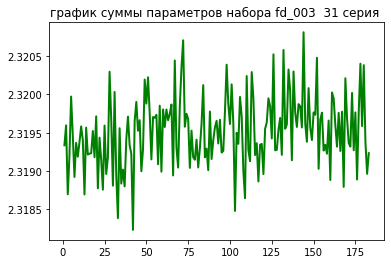

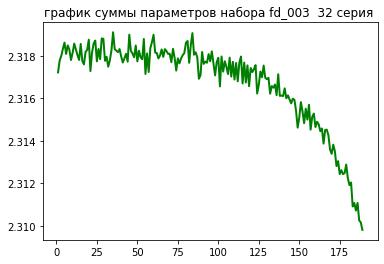

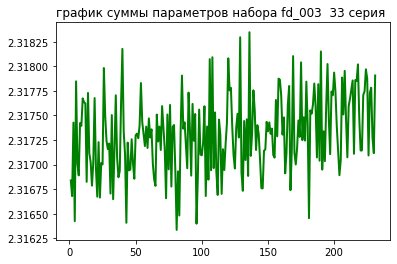

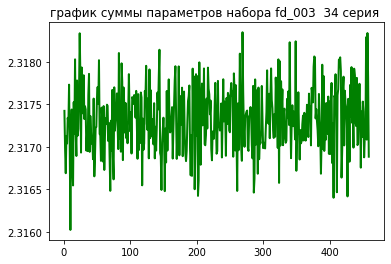

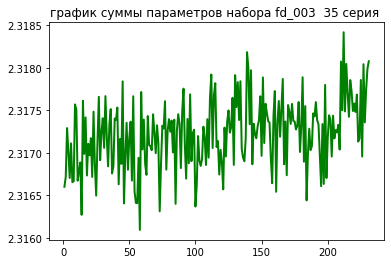

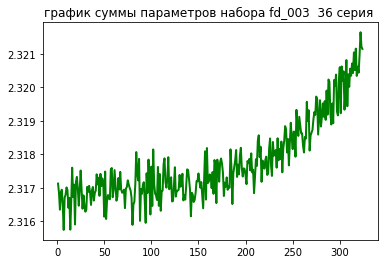

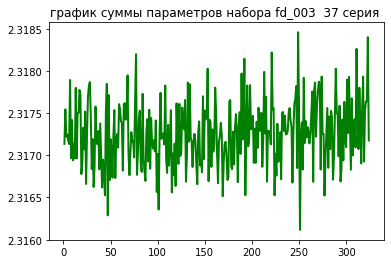

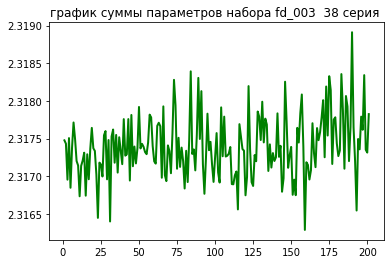

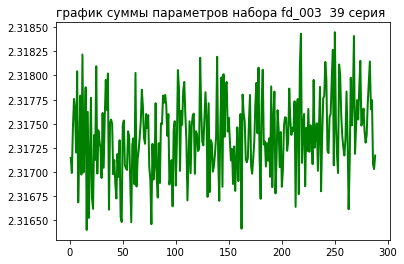

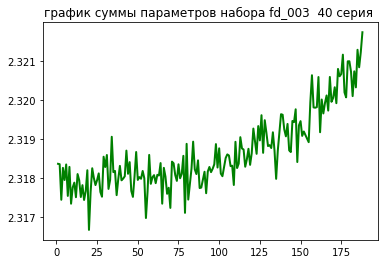

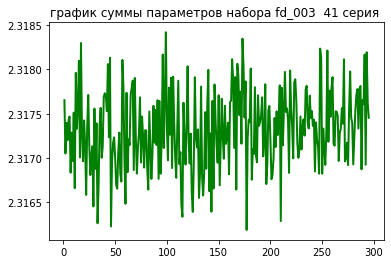

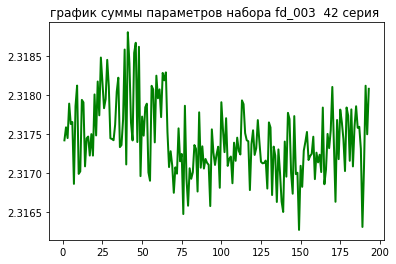

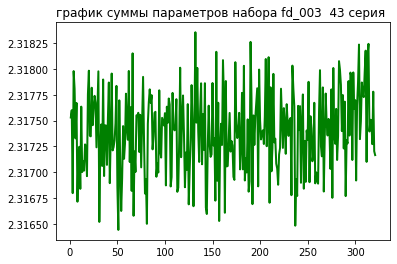

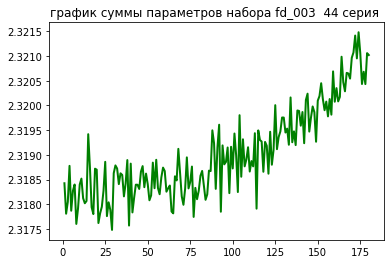

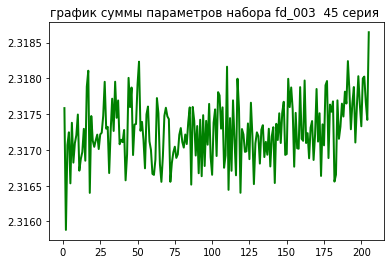

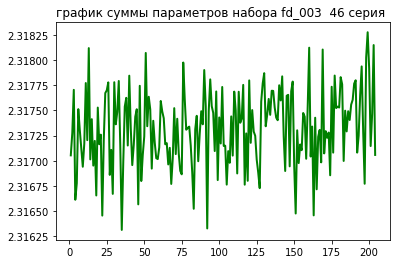

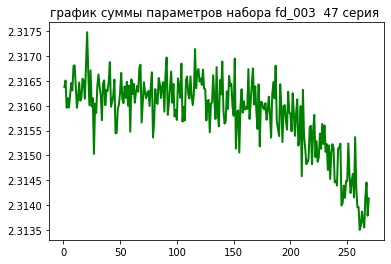

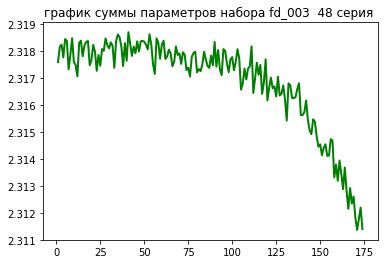

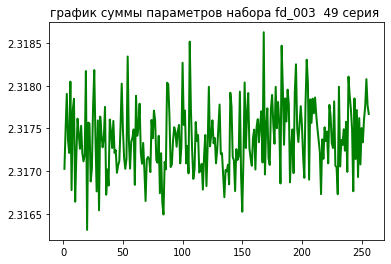

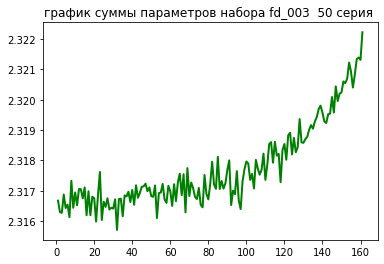

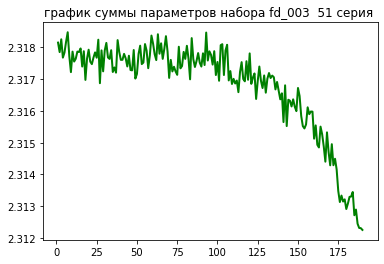

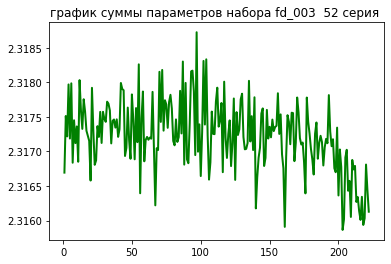

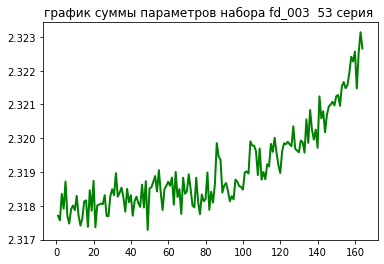

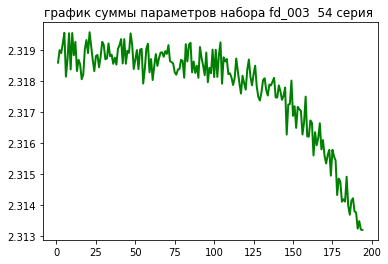

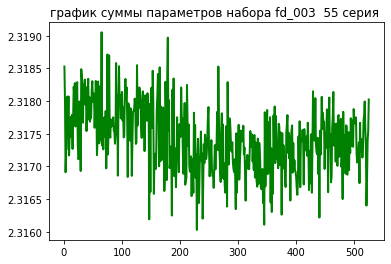

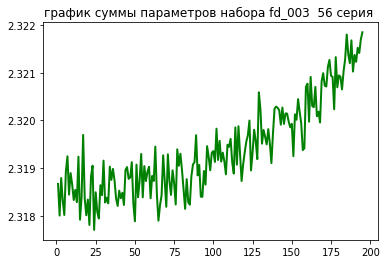

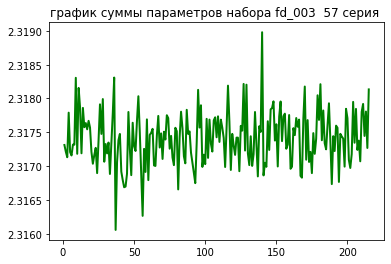

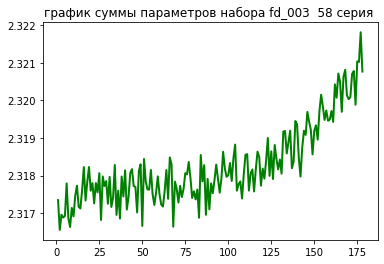

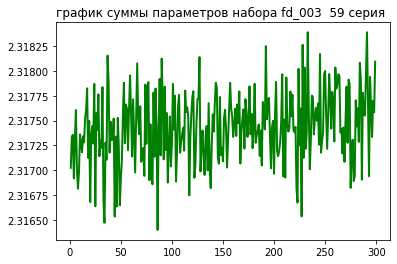

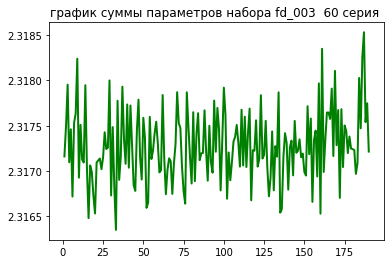

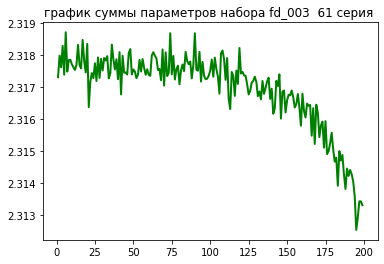

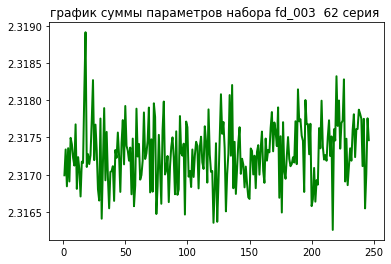

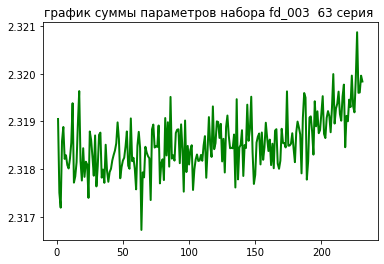

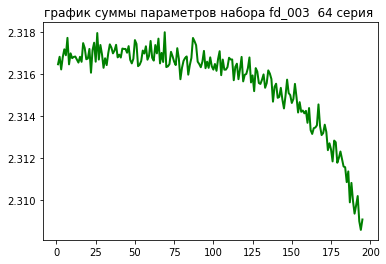

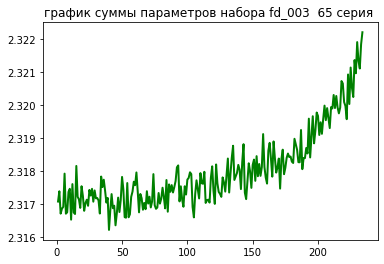

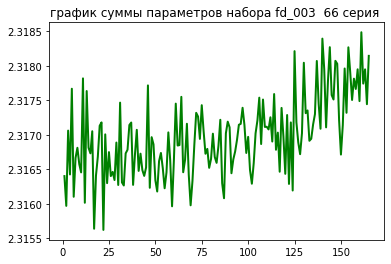

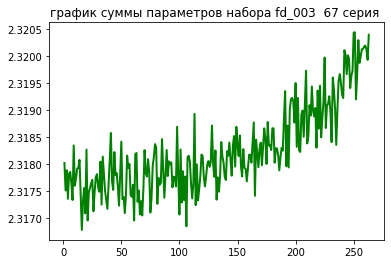

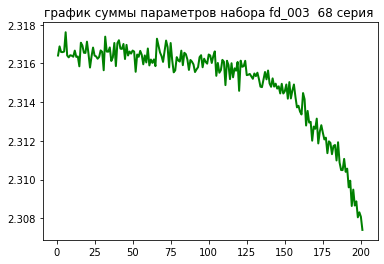

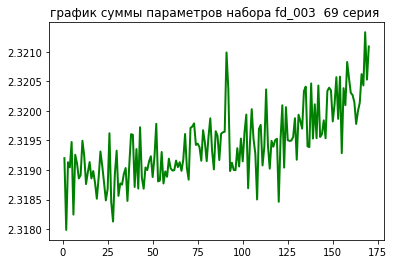

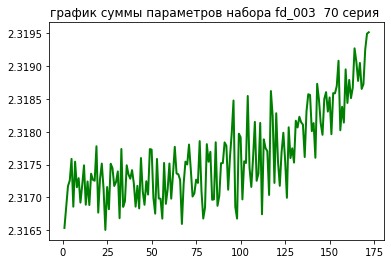

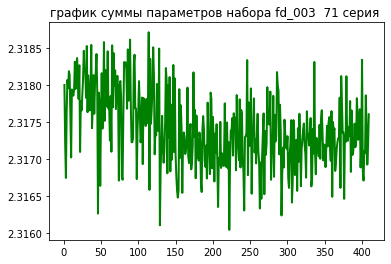

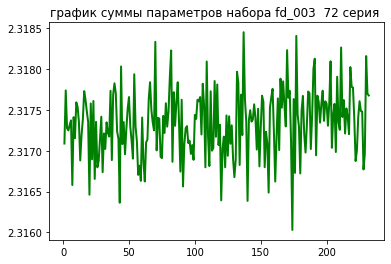

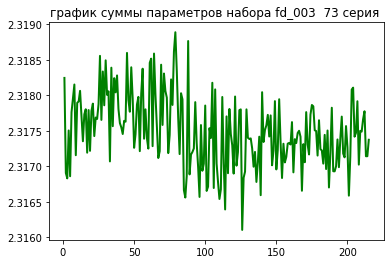

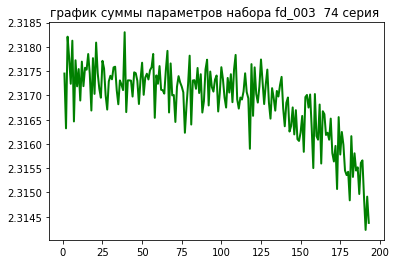

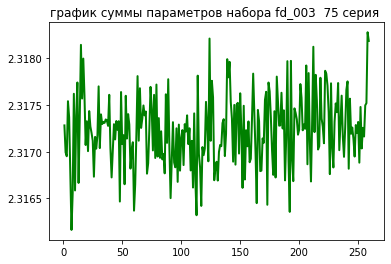

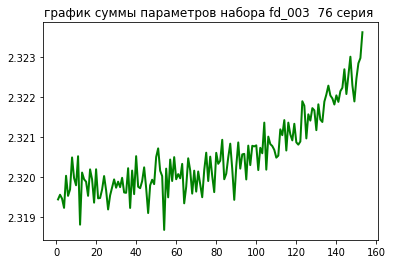

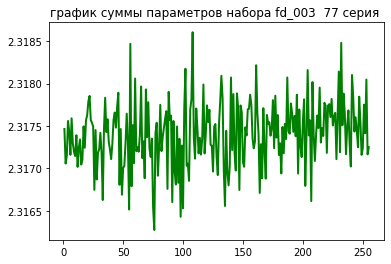

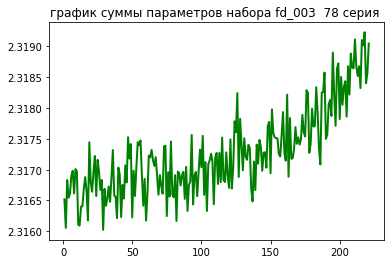

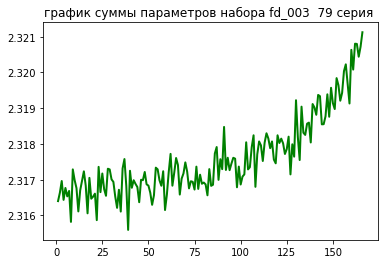

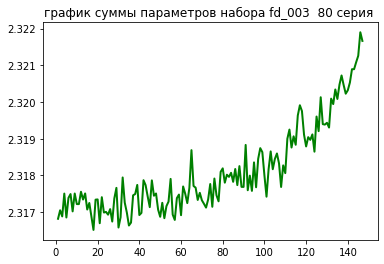

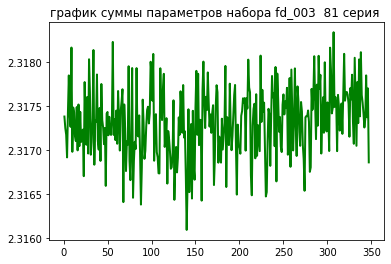

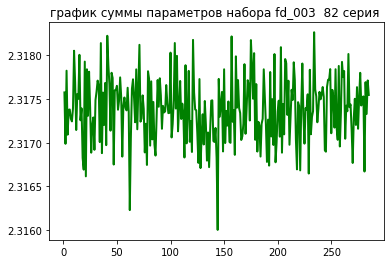

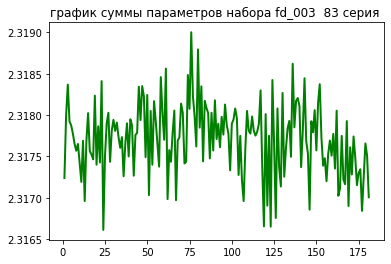

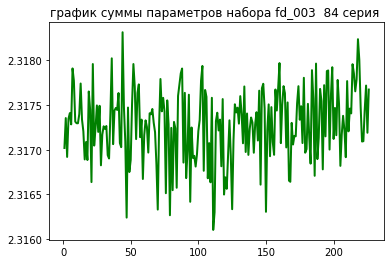

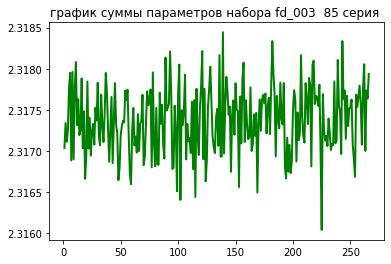

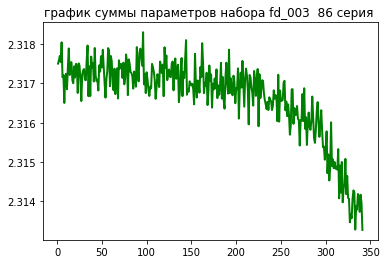

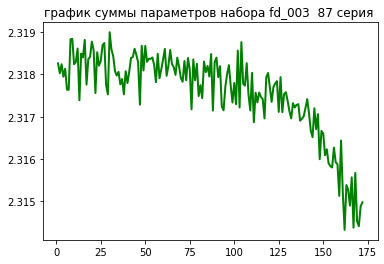

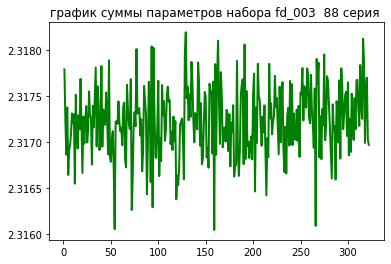

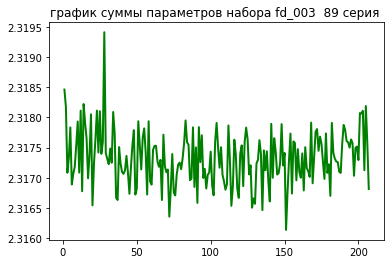

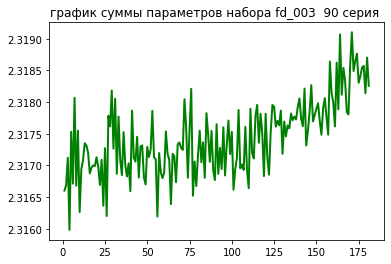

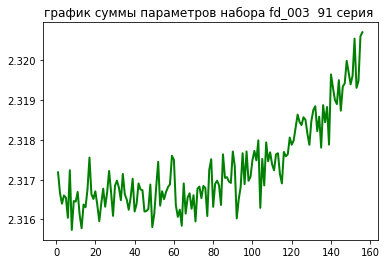

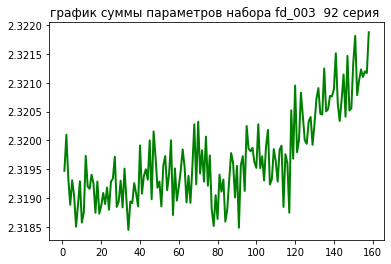

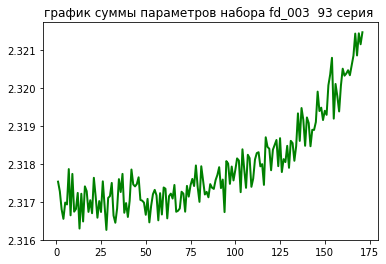

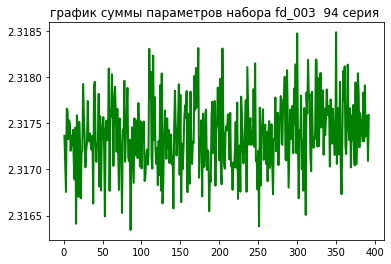

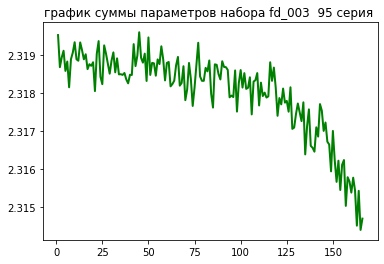

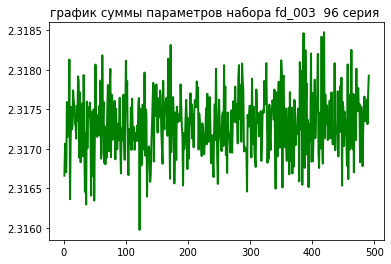

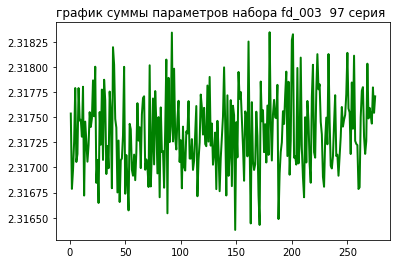

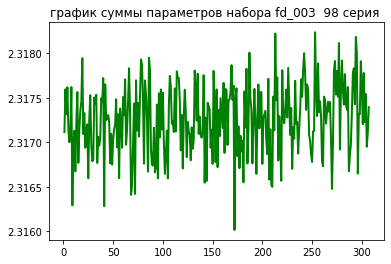

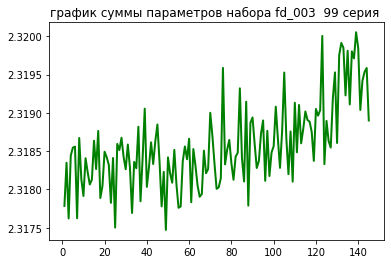

In [287]:
sample_len = fd_003_train[0].max()
for i in range(1,sample_len):
    series = fd_003_train[fd_003_train[0]==i]
    X = series.drop(columns=[0,1])
    X = normalize(X)
    sum_x = X.sum(axis=1)
    x = np.linspace(1, len(sum_x), len(sum_x))[:, np.newaxis]
    plt.title(f'график суммы параметров набора fd_003  {i} серия ')
    plt.plot(x, sum_x, c="g", linewidth=2)
    plt.show()

In [116]:
from sklearn.preprocessing import normalize

In [285]:
# графики для параметров в рамках одной серии  испытаний до поломки
n=13
# здесь формируем серию по номеру испытания из датасета, номер испытания n задается в условии фильтрации
#                                                                       fd_001_train[fd_001_train[0]==n]
series = fd_001_train[fd_001_train[0]==n]
X = series.drop(columns=[0,1])
X = normalize(X)

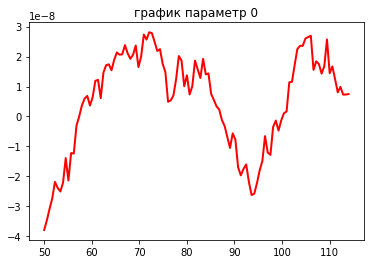

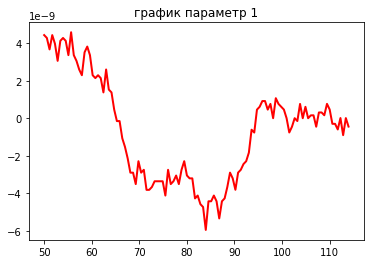

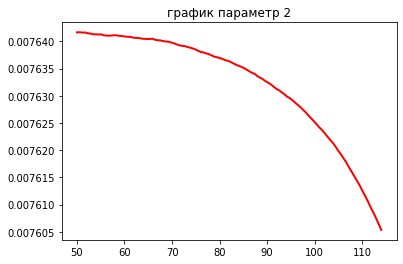

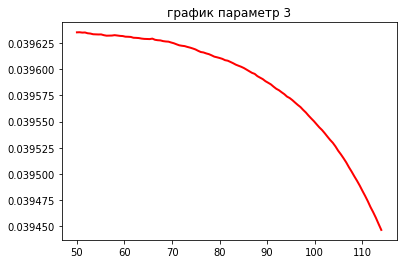

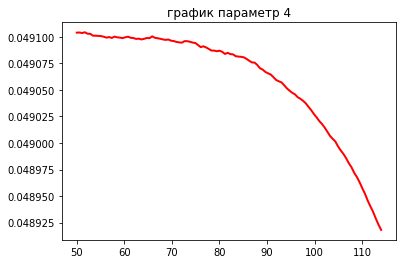

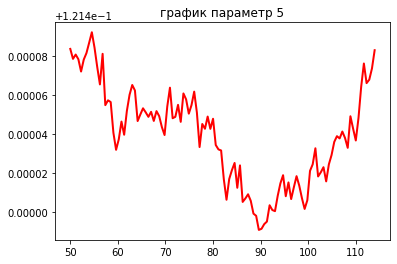

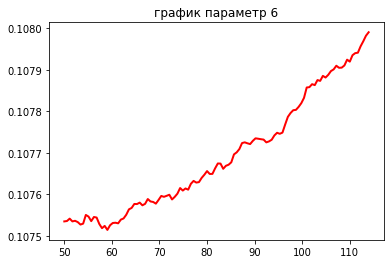

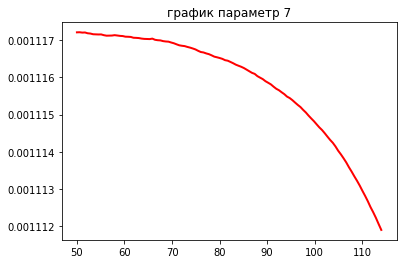

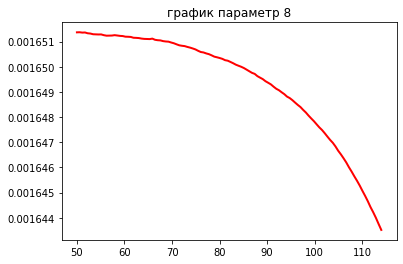

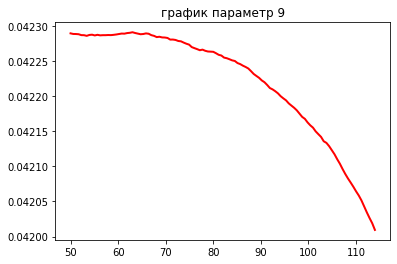

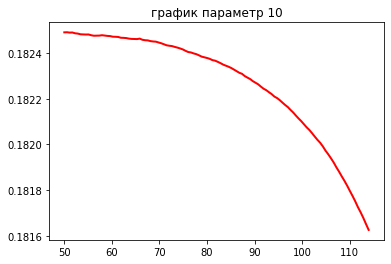

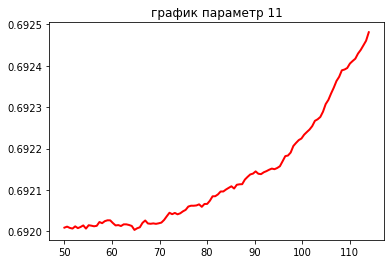

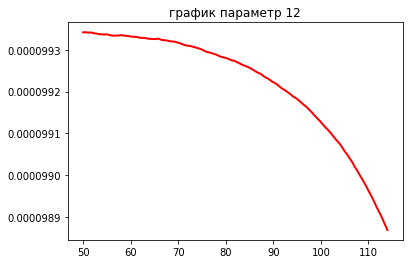

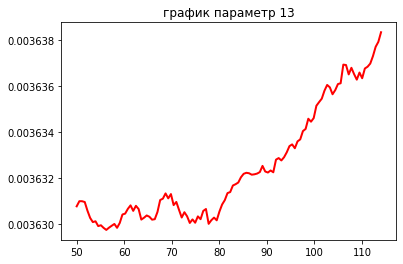

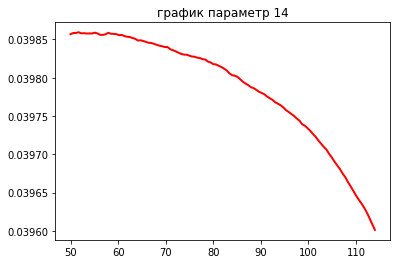

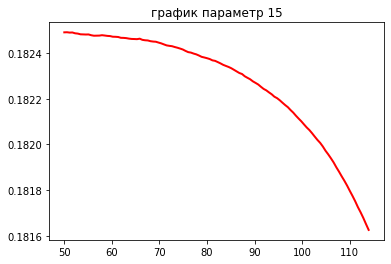

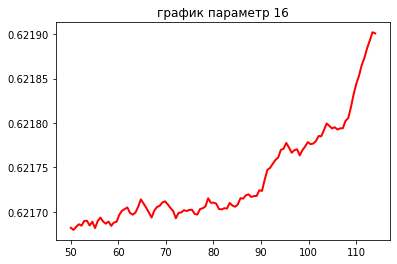

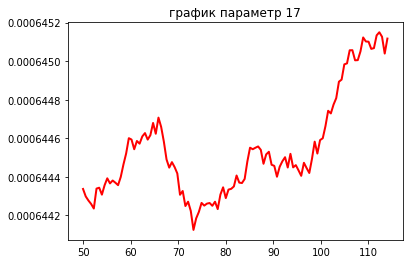

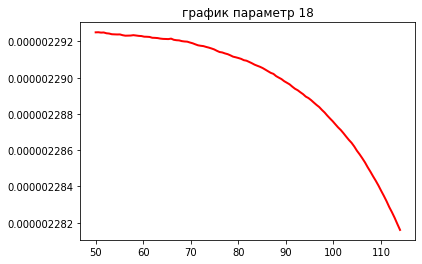

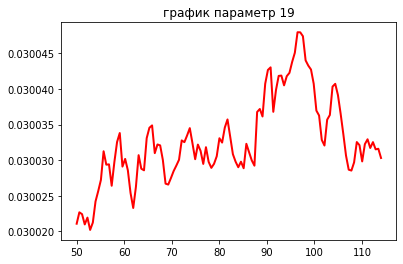

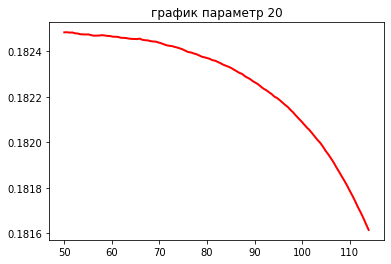

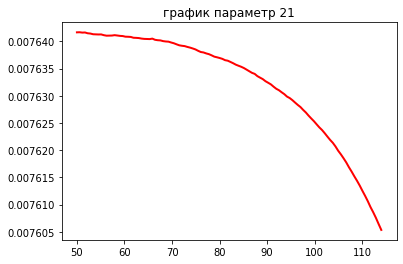

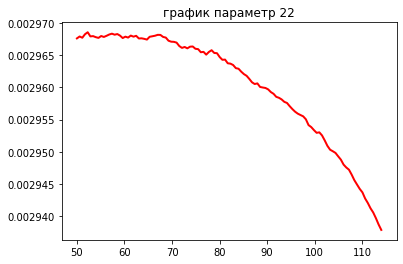

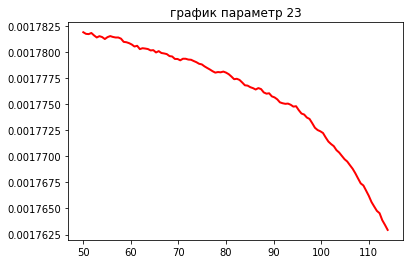

In [286]:
period = 50 # период в циклах для скользящей средней
x = np.linspace(period, len(X[:,1]) - period + 1, len(X[:,1]) - period + 1)[:, np.newaxis]
for i in range(len(X[1])):
    #sum_x = X.sum(axis=1)
    avg = SMA(X[:,i],period)
    plt.title(f'график параметра {i}')
    plt.plot(x, avg, c="r", linewidth=2)
    plt.show()

## Ухудшение параметров чаще всего происходит по экспоненциальному закону

In [ ]:
# отрисовка графиков 1 параметра для всех серий испытаний датасета

In [250]:
# функция для преобразования изменений параметра в относительное (от начального значения) изменение
def deviation_value(data):
    dev_val = []
    for i in range(1,len(data)):
        dev_val.append(abs(data[0] - data[i]))
    return dev_val
        

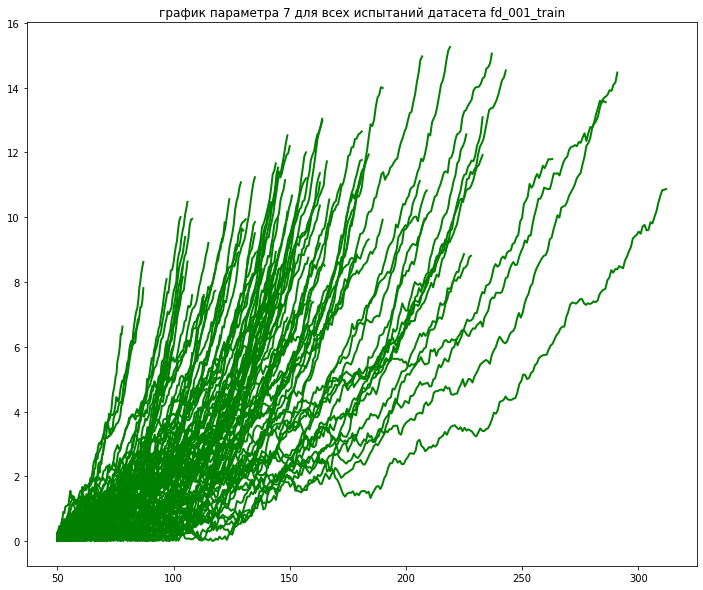

In [512]:
# график для всех испытаний параметра param, значения
#параметров не нормализуем (для проверки правильности функционирования, путем сравнения с исходными данными в fd_001_train)
period = 50
param = 7
for i in range(1,fd_001_train[0].max()+1):
    series = fd_001_train[fd_001_train[0]==i]
    X=series.to_numpy()
    x = np.linspace(period, len(X[:,param]) - period , len(X[:,param]) - period)[:, np.newaxis]
    avg = SMA(X[:,param],period)
    dv = deviation_value(avg)
    plt.title(f'график параметра {param} для всех испытаний датасета fd_001_train')
    plt.plot(x, dv, c="g", linewidth=2)
plt.show()

In [414]:
# в списке max_param находится конечное отклонение от начального значения
#[номер эксперимента, номер параметра, конечное значение]
period = 50
columns = fd_001_train.columns
max_param = []
for column in columns:
    for i in range(1,fd_001_train[0].max()+1):
        series = fd_001_train[fd_001_train[0]==i]
        X=series.to_numpy()
        avg = SMA(X[:,column],period)
        dv = deviation_value(avg)
        max_param.append([i,column,dv[-1]])


In [415]:
max_param

[[1, 0, 0.0],
 [2, 0, 0.0],
 [3, 0, 0.0],
 [4, 0, 0.0],
 [5, 0, 0.0],
 [6, 0, 0.0],
 [7, 0, 0.0],
 [8, 0, 0.0],
 [9, 0, 0.0],
 [10, 0, 0.0],
 [11, 0, 0.0],
 [12, 0, 0.0],
 [13, 0, 0.0],
 [14, 0, 0.0],
 [15, 0, 0.0],
 [16, 0, 0.0],
 [17, 0, 0.0],
 [18, 0, 0.0],
 [19, 0, 0.0],
 [20, 0, 0.0],
 [21, 0, 0.0],
 [22, 0, 0.0],
 [23, 0, 0.0],
 [24, 0, 0.0],
 [25, 0, 0.0],
 [26, 0, 0.0],
 [27, 0, 0.0],
 [28, 0, 0.0],
 [29, 0, 0.0],
 [30, 0, 0.0],
 [31, 0, 0.0],
 [32, 0, 0.0],
 [33, 0, 0.0],
 [34, 0, 0.0],
 [35, 0, 0.0],
 [36, 0, 0.0],
 [37, 0, 0.0],
 [38, 0, 0.0],
 [39, 0, 0.0],
 [40, 0, 0.0],
 [41, 0, 0.0],
 [42, 0, 0.0],
 [43, 0, 0.0],
 [44, 0, 0.0],
 [45, 0, 0.0],
 [46, 0, 0.0],
 [47, 0, 0.0],
 [48, 0, 0.0],
 [49, 0, 0.0],
 [50, 0, 0.0],
 [51, 0, 0.0],
 [52, 0, 0.0],
 [53, 0, 0.0],
 [54, 0, 0.0],
 [55, 0, 0.0],
 [56, 0, 0.0],
 [57, 0, 0.0],
 [58, 0, 0.0],
 [59, 0, 0.0],
 [60, 0, 0.0],
 [61, 0, 0.0],
 [62, 0, 0.0],
 [63, 0, 7.105427357601002e-15],
 [64, 0, 0.0],
 [65, 0, 0.0],
 [66, 0, 0.0],
 

In [416]:
# преобразование в DataFrame
max_df = pd.DataFrame(data=max_param,columns=['test_number','parameter','value'])

In [417]:
max_df.head()

test_number  parameter  value
0            1          0    0.0
1            2          0    0.0
2            3          0    0.0
3            4          0    0.0
4            5          0    0.0

In [418]:
# maximum_for_param - список с максимальными (среди всех экспериментов) значениями каждого параметра 
# для дальнейшего вывода в диаграмме конечных значений в процентах относительно этих значений
maximum_for_param = max_df.groupby('parameter').max()['value'].to_list()
maximum_for_param

[7.105427357601002e-15,
 311.9999999999999,
 0.0012039999999999998,
 0.00014600000000000013,
 0.0,
 0.0,
 1.2857999999996537,
 15.25780000000168,
 24.856199999999262,
 0.0,
 0.0022000000000339526,
 2.390199999999709,
 0.21459999999660795,
 93.24539999999797,
 0.0,
 0.7495999999999938,
 2.1631999999999607,
 0.21839999999656357,
 78.93179999999757,
 0.10148399999999747,
 0.0,
 3.7200000000002547,
 0.0,
 0.0,
 0.46719999999997697,
 0.27868400000003035]

In [419]:
# функция возвращает значение 'value' в процентах относительно максимального для этого параметра значения
def norm(data):
    return (data['value'] / maximum_for_param[int(data['parameter'])]) * 100 

In [420]:
max_df['percents_from_max'] = max_df.apply(norm,axis=1)

C:\Miniconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [421]:
import seaborn as sns

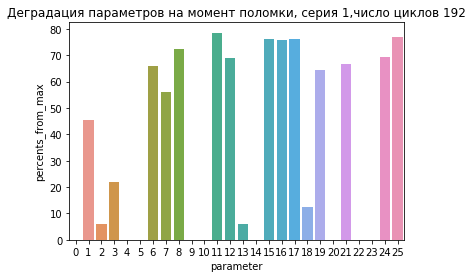

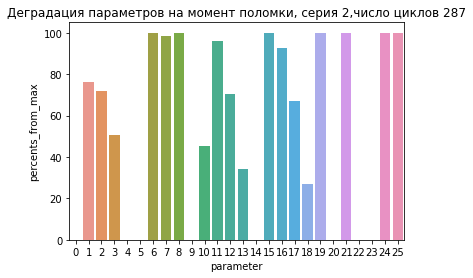

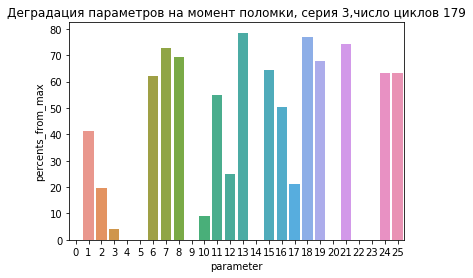

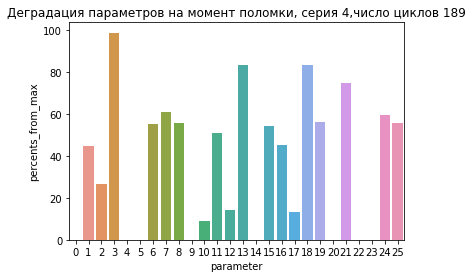

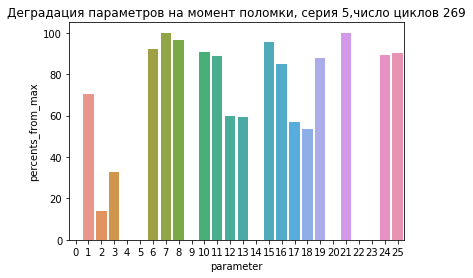

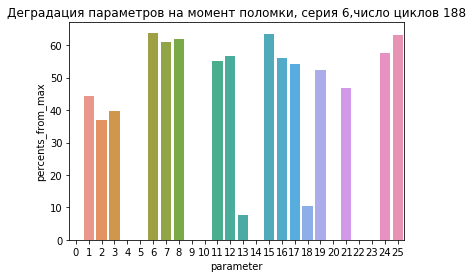

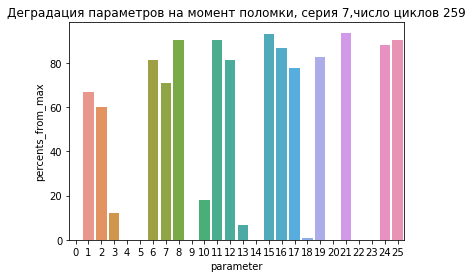

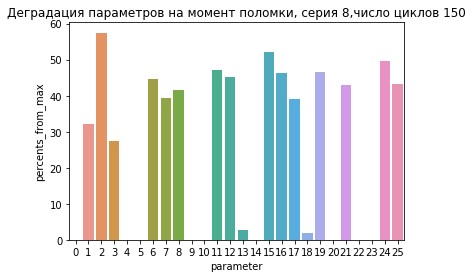

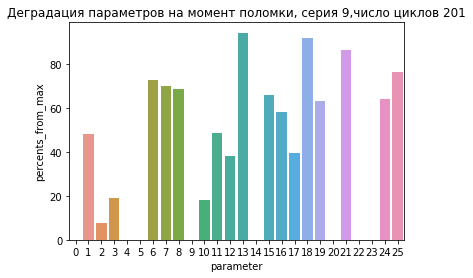

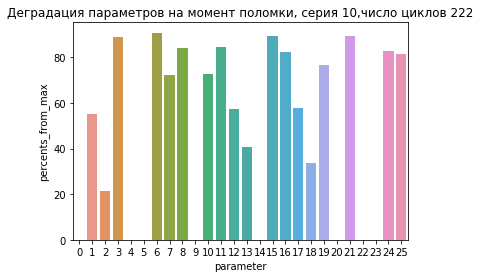

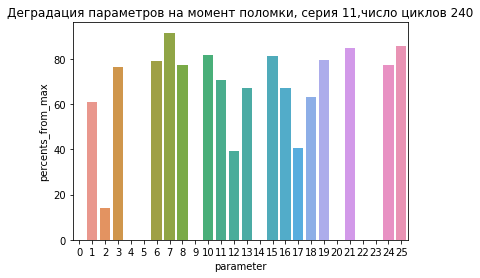

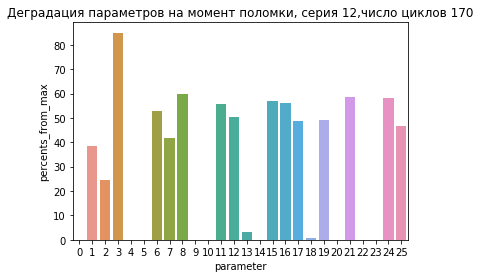

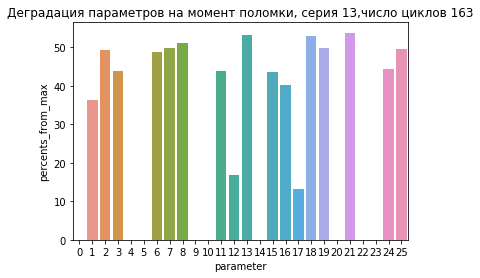

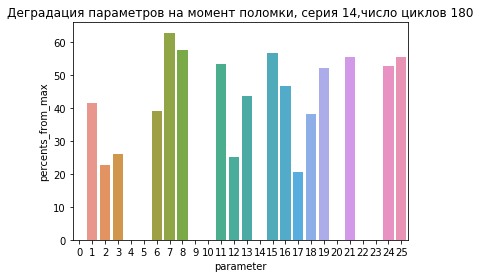

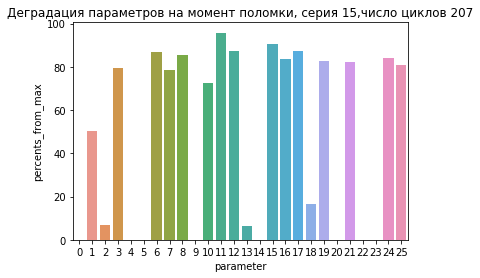

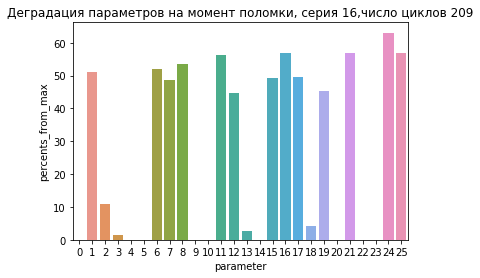

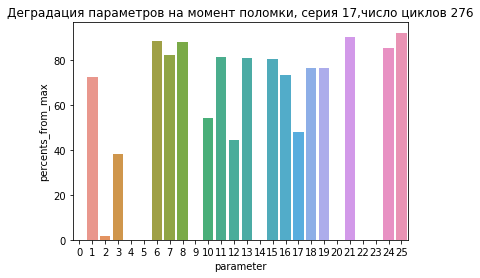

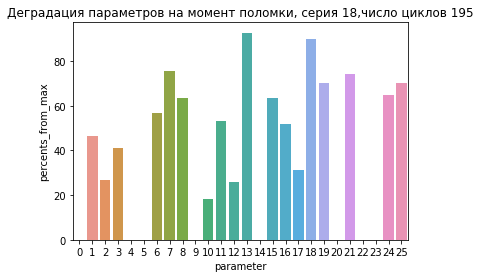

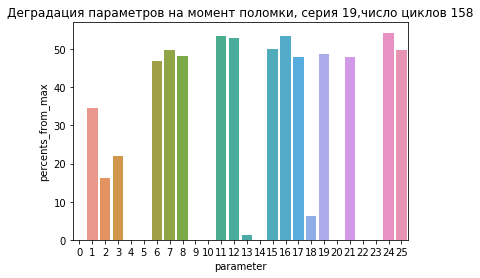

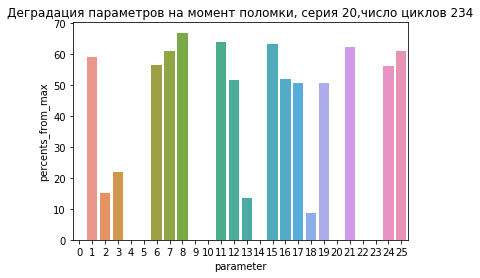

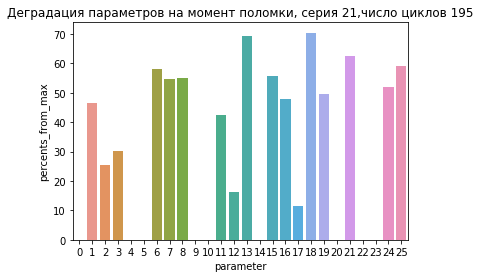

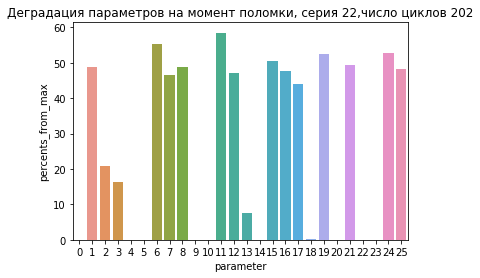

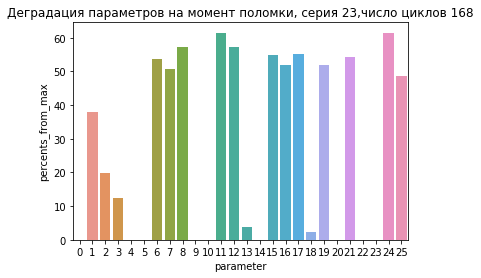

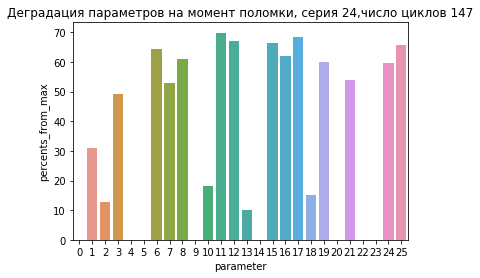

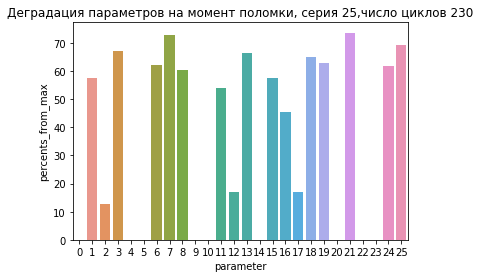

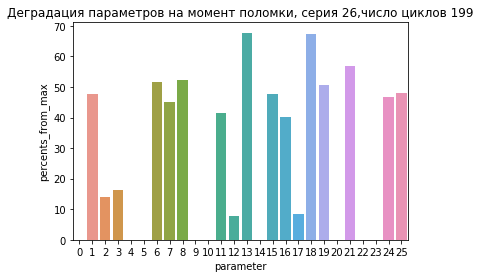

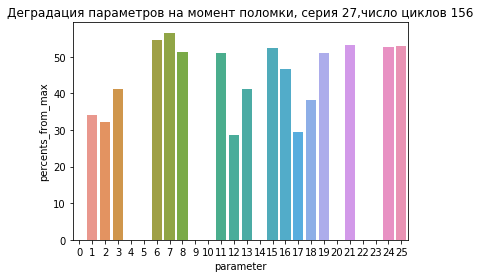

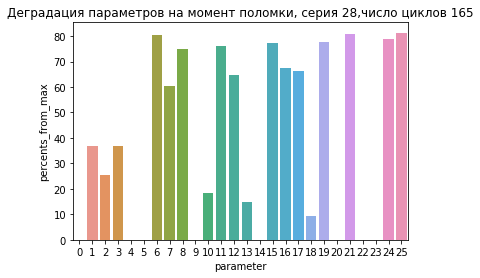

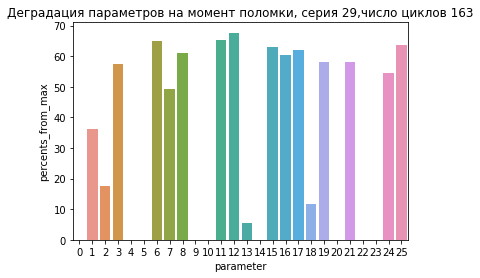

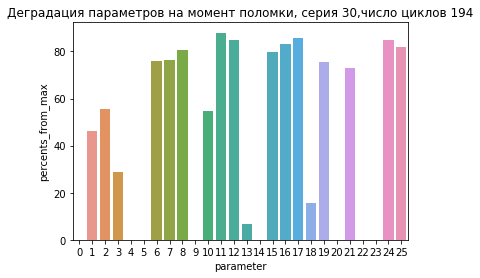

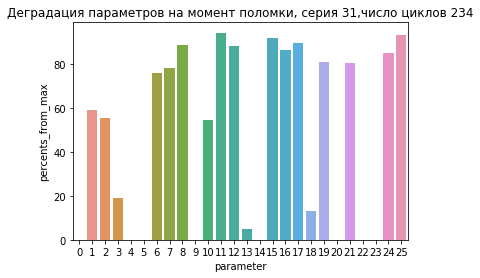

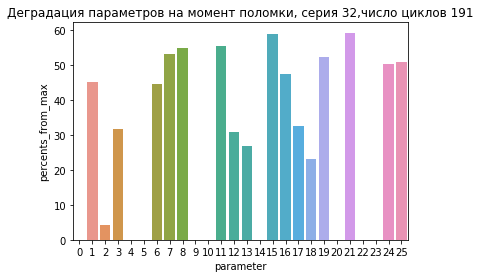

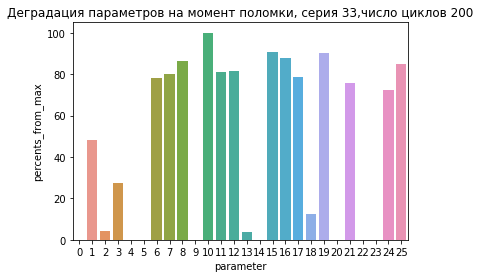

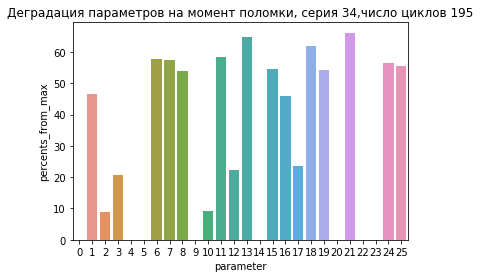

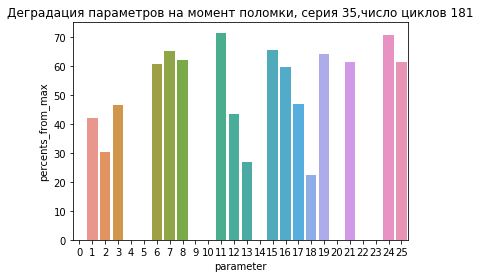

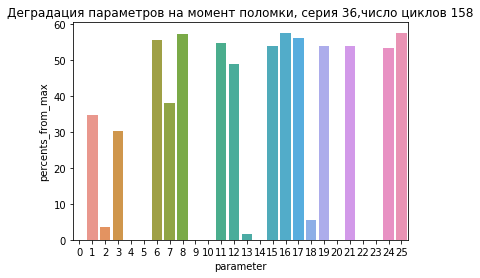

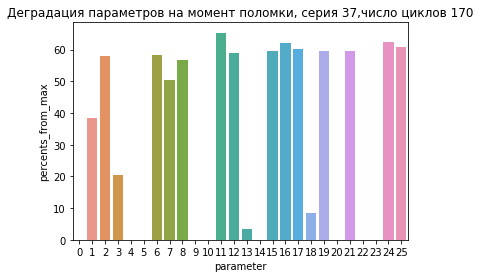

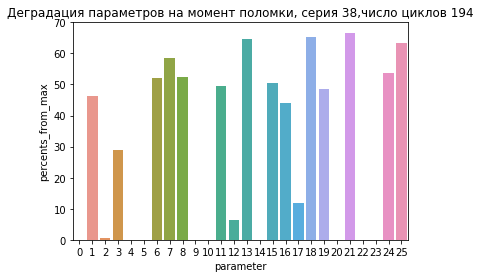

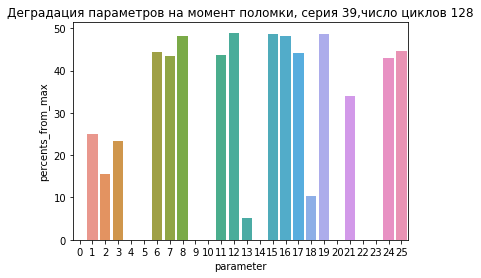

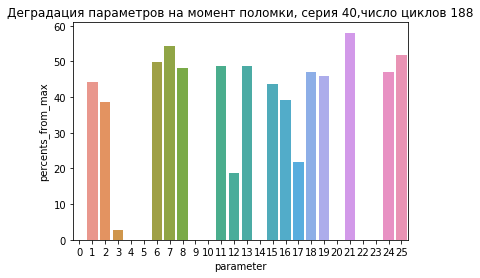

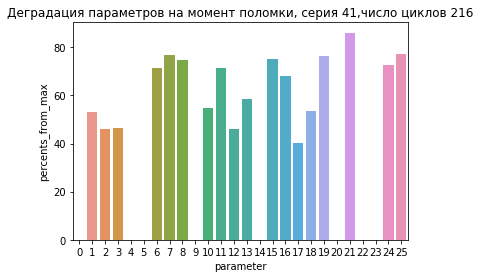

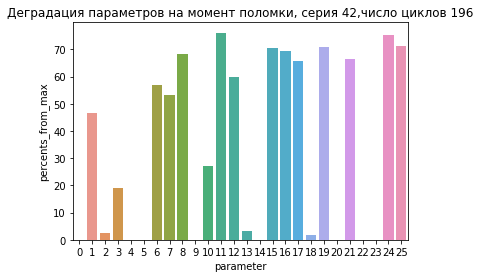

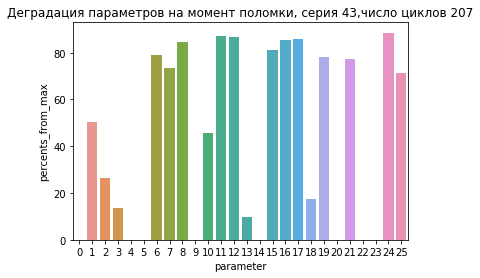

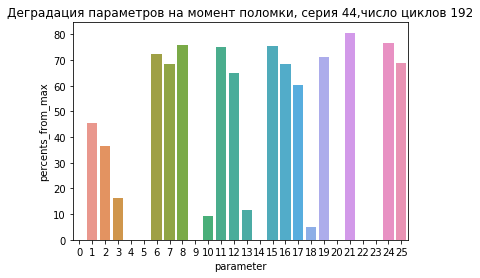

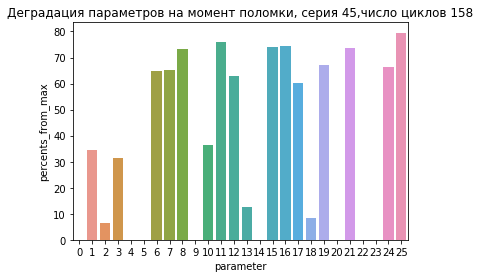

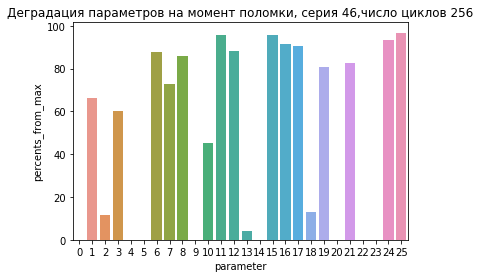

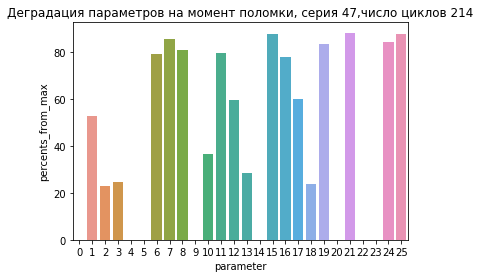

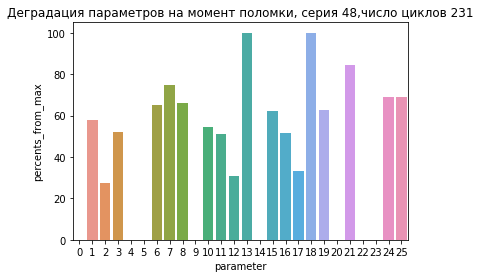

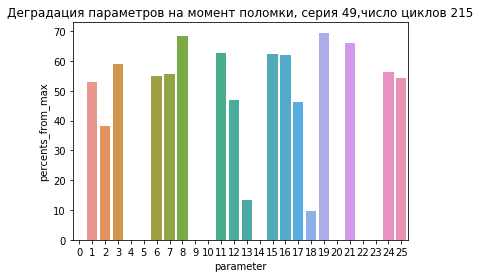

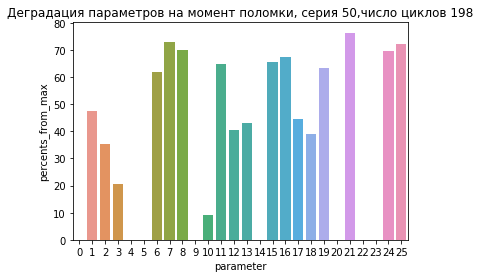

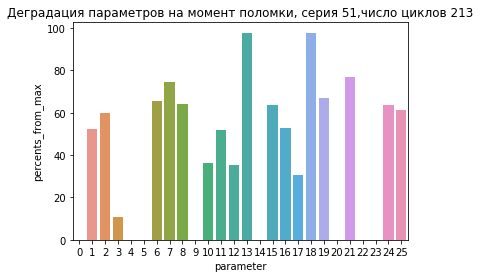

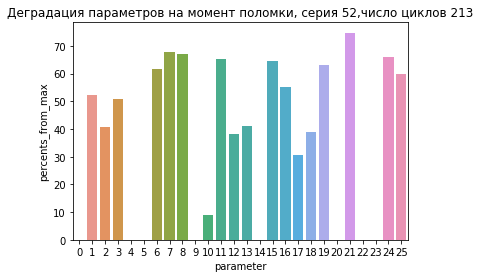

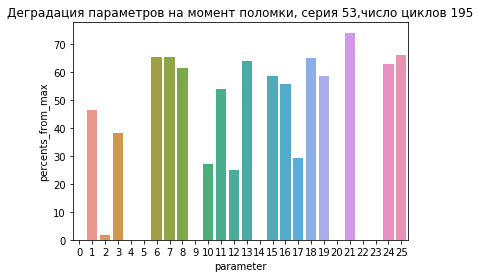

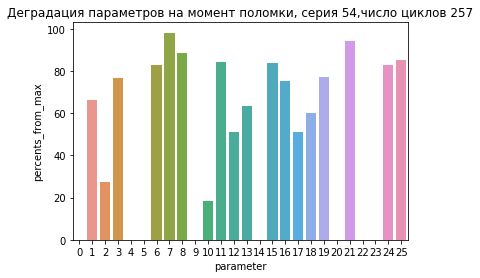

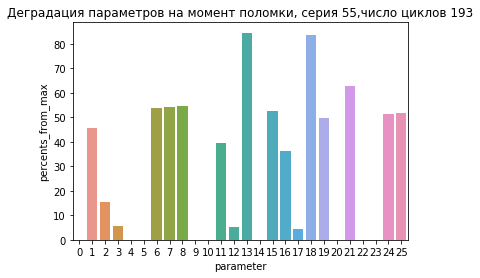

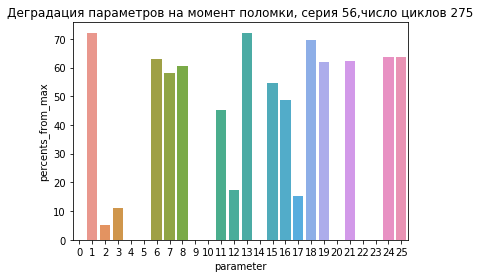

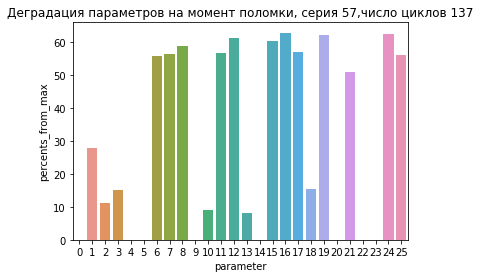

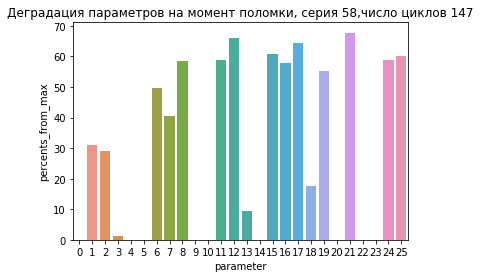

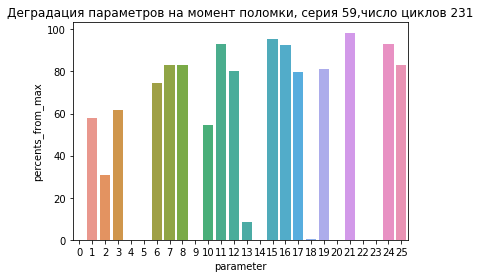

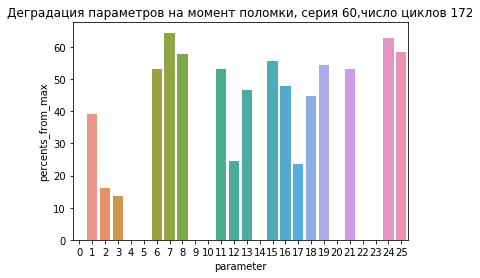

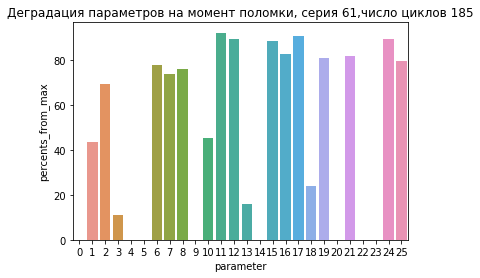

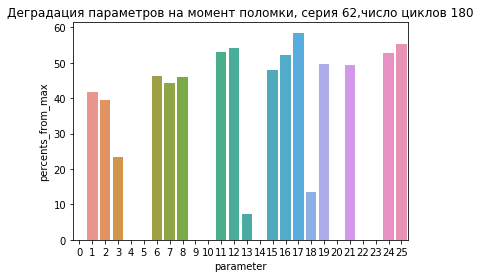

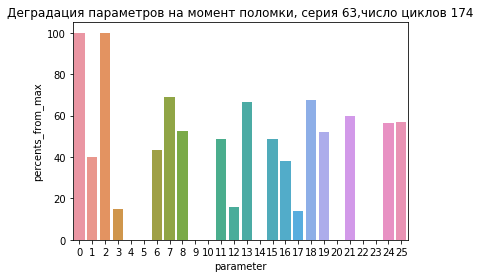

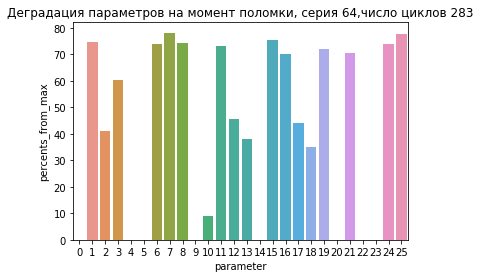

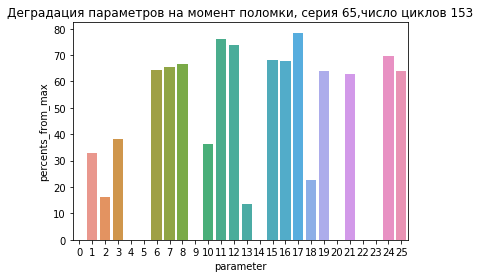

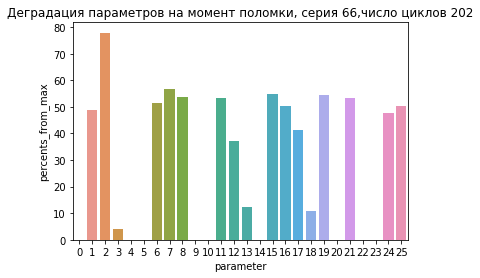

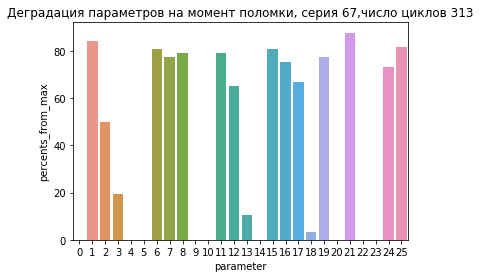

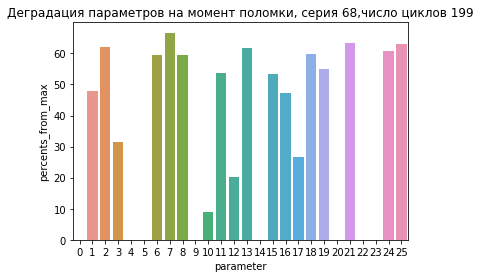

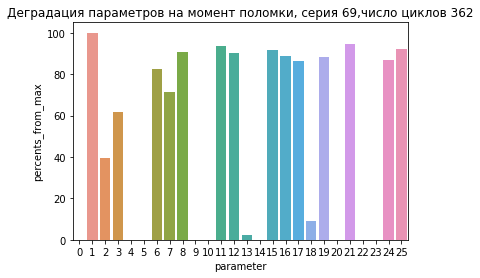

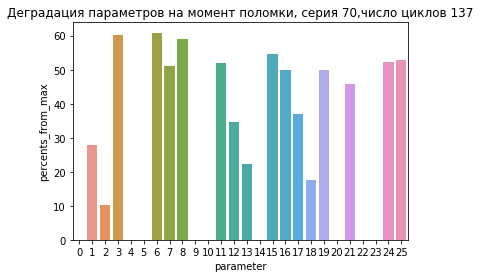

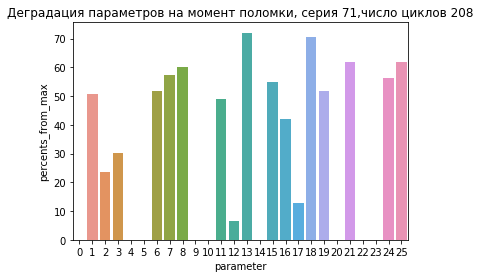

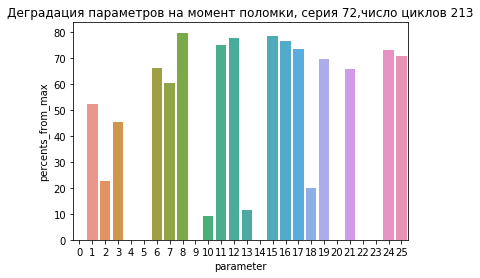

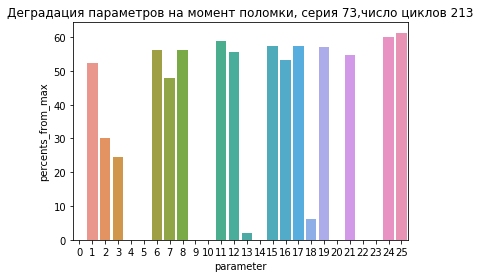

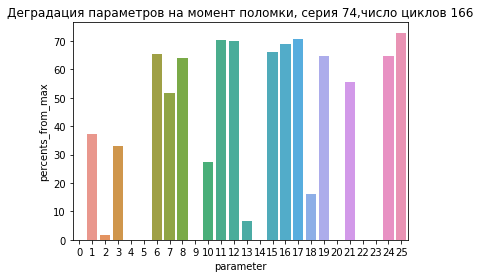

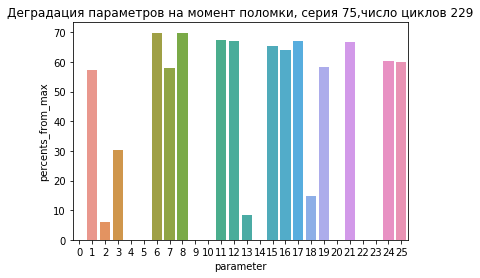

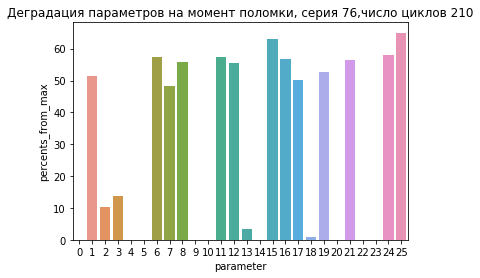

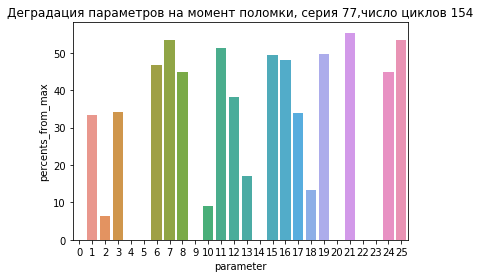

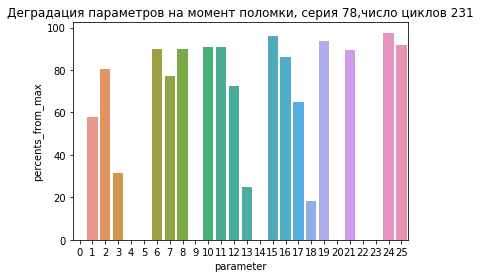

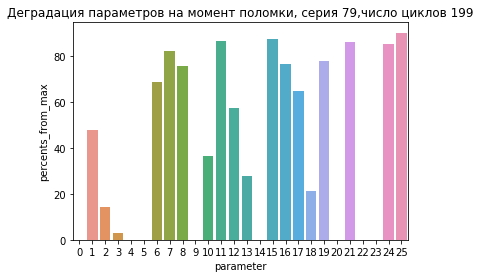

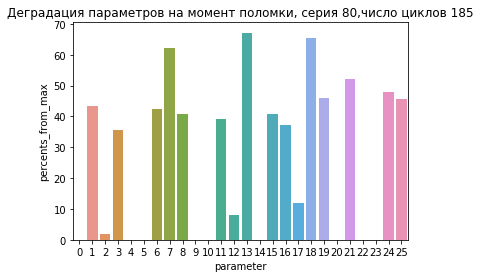

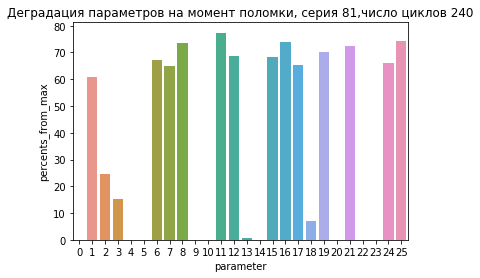

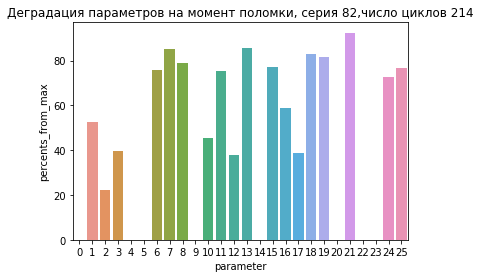

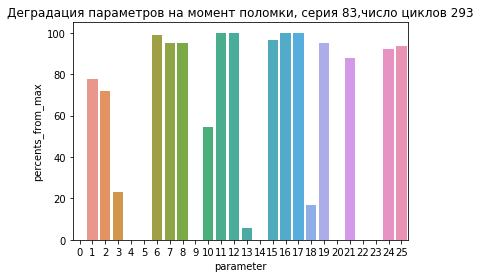

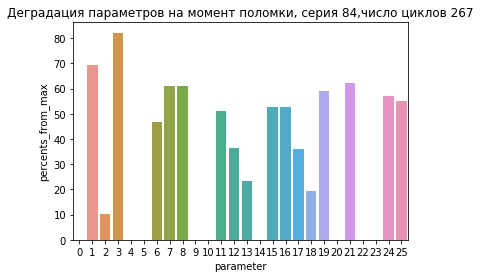

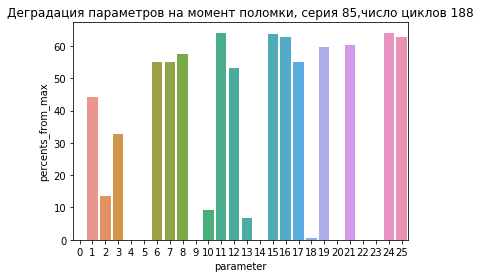

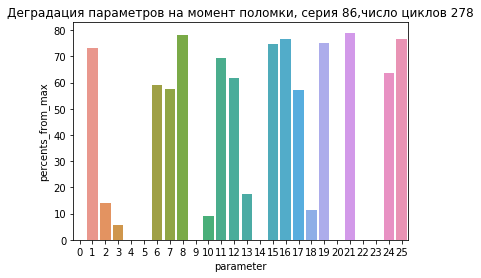

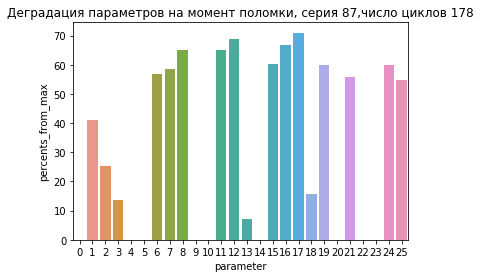

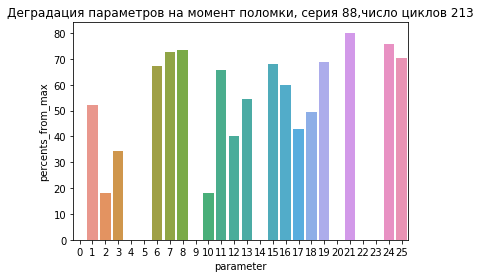

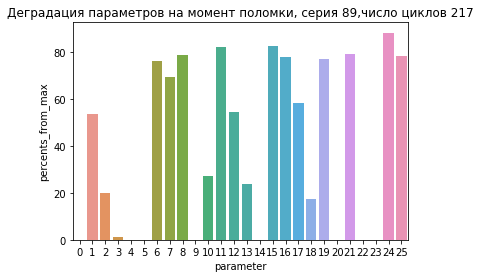

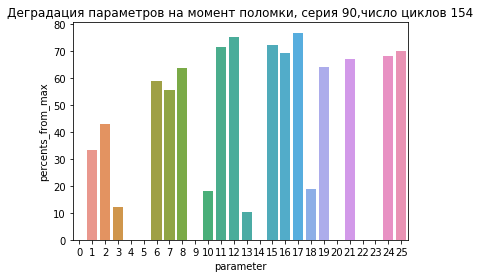

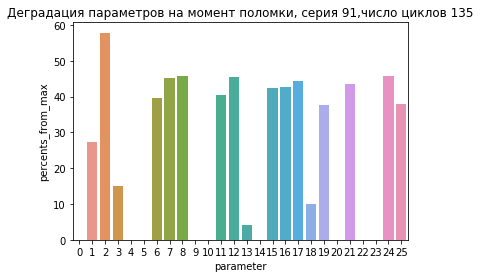

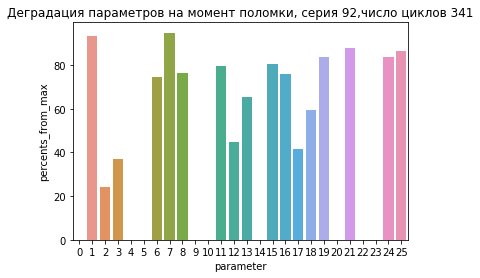

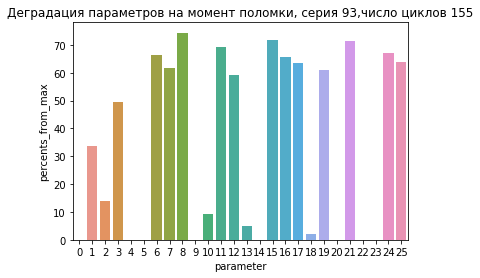

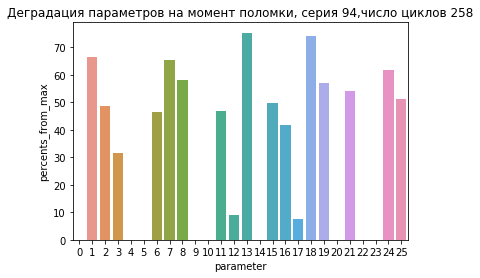

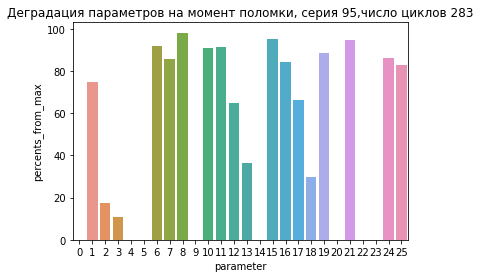

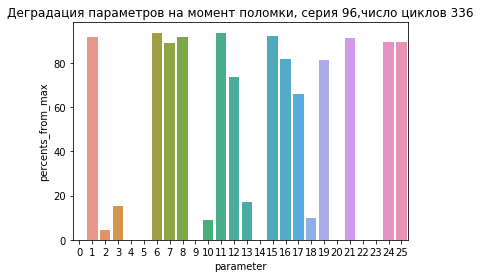

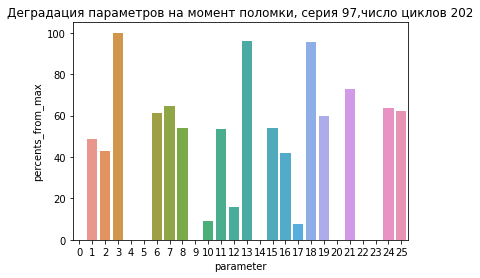

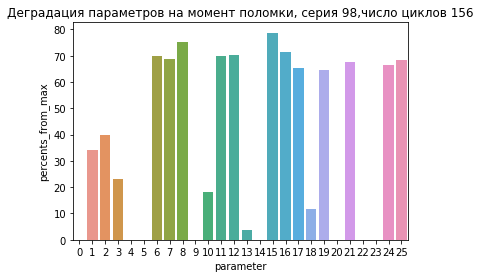

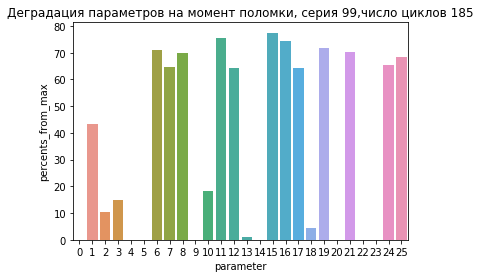

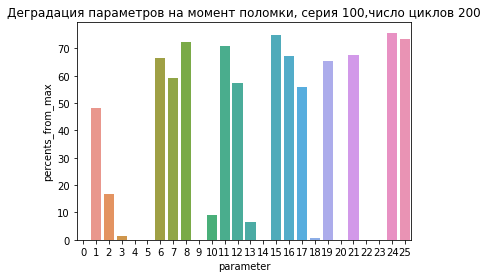

In [436]:
# 1 - количество циклов относительно максимального в этом датасете
# 2,3,4 - условия эксплуатации (температура, высота, обороты )?
# параметры в которых нулевые значения - константные
for test in max_df['test_number'].unique():
    data = max_df[max_df['test_number'] == test]
    plt.title(f'Деградация параметров на момент поломки, серия {test},число циклов {fd_001_train[fd_001_train[0]==test ][1].max()}')
    sns.barplot(x="parameter", y="percents_from_max", data=data)
    plt.show()

In [433]:
fd_001_train[fd_001_train[0] == 1][1].max()

192

## Как видно на представленных диаграммах максимальное значение деградации параметров, контроллируемых датчиками сильно разнится от эксперимента к эксперименту, очевидно, что значительное воздействие на конечное значение и скорость с которой происходят изменения в контроллируемых параметрах зависит от исходных установок (условий эксплуатации двигателя) - параметры 2,3

## Вопросы к дипломному руководителю:

1. Каким из алгоритмов ML лучше всего воспользоваться для предсказания числа циклов до поломки ?
2. Видна ли перспектива решения данной задачи, используя выполненные преобразования ?
3. Если нет перспективы возможно ли защитить диплом используя статистические методы (например группировка экспериментов по скорости ухудшения параметров за цикл и вывод среднего для данной группировки времени функционирования в циклах ?)


In [454]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,10

1
1
1
1
1
1


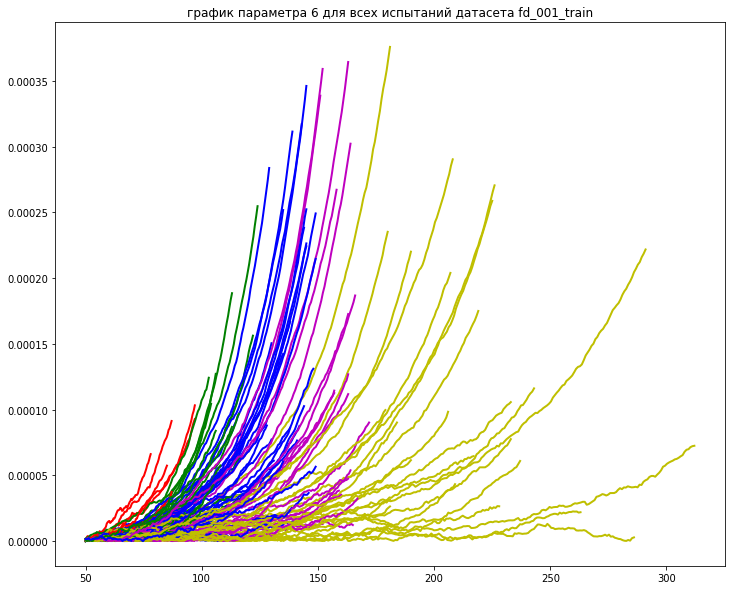

In [558]:
# график для всех испытаний параметра param, значения параметров нормализуем 
period = 50
param = 6
for i in range(1,100):
    series = fd_001_train[fd_001_train[0]==i]
    X=normalize(series)
    x = np.linspace(period, len(X[:,param]) - period , len(X[:,param]) - period)[:, np.newaxis]
    avg = SMA(X[:,param],period)
    dv = deviation_value(avg)
    plt.title(f'график параметра {param} для всех испытаний датасета fd_001_train')
    len_x = len(x)
    if len_x < 100:
        plt.plot(x, dv, c="r", linewidth=2)
        print('1')
    elif (len_x >=100) & (len_x < 125):
        plt.plot(x, dv, c="g", linewidth=2)
    elif (len_x >=125) & (len_x < 150):
        plt.plot(x, dv, c="b", linewidth=2)
    elif (len_x >=150) & (len_x < 175):
        plt.plot(x, dv, c="m", linewidth=2)    
    else:
        plt.plot(x, dv, c="y", linewidth=2)
plt.show()

In [547]:
a = pd.DataFrame()